## Get all scores for property address

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import sys
import urllib.request

In [4]:
data = pd.read_csv('C:/Users/Preeti/Github/CapstoneProject/data/hc_xfer_unique_100k_20180909.txt',sep="|")


In [5]:
data

,lat,long,accuracy,formatted_address,address_type,status,index
0,39.138995,-84.714726,establishment,"235 Main St, Addyston, OH 45001, USA","establishment,point_of_interest,police",OK,1
1,39.103118,-84.512020,locality,"Cincinnati, OH, USA","locality,political",OK,2
2,39.140958,-84.711156,street_address,"1 Church St, Addyston, OH 45001, USA",street_address,OK,3
3,39.136806,-84.708632,street_address,"101 Main St, Erlanger, OH 41018, USA",street_address,OK,4
4,39.103118,-84.512020,locality,"Cincinnati, OH, USA","locality,political",OK,5
5,39.138351,-84.709616,premise,"125 1st St, Addyston, OH 45001, USA",premise,OK,6
6,39.138707,-84.709181,street_address,"130 1st St, Addyston, OH 45001, USA",street_address,OK,7
7,39.139193,-84.709547,premise,"143 1st St, Addyston, OH 45001, USA",premise,OK,8
8,39.140231,-84.709425,premise,"165 1st St, Addyston, OH 45001, USA",premise,OK,9
9,39.140988,-84.708800,street_address,"170 1st St, Addyston, OH 45001, USA",street_address,OK,10


## splitting address column into address, city, state and zipcode only for non-locality addresses

In [6]:
#data['address'] =
#data['formatted_address'].split(',')
data['address_line_1'] = data[data['accuracy'] != 'locality'].formatted_address.str.split(',').str[0]
data['city']= data.formatted_address.str.split(',').str[1]
data['zip1'] = data[data['accuracy'] != 'locality'].formatted_address.str.split(',').str[2]
#data['city'] = data[data['accuracy'] == 'locality'].formatted_address.str.split(',').str[0]
#data['city'] = data.formatted_address.str.split(',').str[1]
data['state'] = 'OH'
data['zipCode'] = data.zip1.str.replace('OH','')
#data['zip'] = data.formatted_address.str.split(',').str[2]

## Create subset dataframe for which scores needs to be calculated

In [7]:
df = data[data['accuracy'] != 'locality']

In [8]:
df.reset_index(inplace=True)
df

,level_0,lat,long,accuracy,formatted_address,address_type,status,index,address_line_1,city,zip1,state,zipCode
0,0,39.138995,-84.714726,establishment,"235 Main St, Addyston, OH 45001, USA","establishment,point_of_interest,police",OK,1,235 Main St,Addyston,OH 45001,OH,45001
1,2,39.140958,-84.711156,street_address,"1 Church St, Addyston, OH 45001, USA",street_address,OK,3,1 Church St,Addyston,OH 45001,OH,45001
2,3,39.136806,-84.708632,street_address,"101 Main St, Erlanger, OH 41018, USA",street_address,OK,4,101 Main St,Erlanger,OH 41018,OH,41018
3,5,39.138351,-84.709616,premise,"125 1st St, Addyston, OH 45001, USA",premise,OK,6,125 1st St,Addyston,OH 45001,OH,45001
4,6,39.138707,-84.709181,street_address,"130 1st St, Addyston, OH 45001, USA",street_address,OK,7,130 1st St,Addyston,OH 45001,OH,45001
5,7,39.139193,-84.709547,premise,"143 1st St, Addyston, OH 45001, USA",premise,OK,8,143 1st St,Addyston,OH 45001,OH,45001
6,8,39.140231,-84.709425,premise,"165 1st St, Addyston, OH 45001, USA",premise,OK,9,165 1st St,Addyston,OH 45001,OH,45001
7,9,39.140988,-84.708800,street_address,"170 1st St, Addyston, OH 45001, USA",street_address,OK,10,170 1st St,Addyston,OH 45001,OH,45001
8,10,39.141453,-84.709363,street_address,"177 1st St, Addyston, OH 45001, USA",street_address,OK,11,177 1st St,Addyston,OH 45001,OH,45001
9,11,39.134324,-84.702779,street_address,"18 Main St, Erlanger, OH 41018, USA",street_address,OK,12,18 Main St,Erlanger,OH 41018,OH,41018


## Dataframe to create csv file

In [93]:
final_table = pd.DataFrame(columns = [
    'AddressID',
    'Address',
    'City',
    'State',
    'ZipCode',
    'WalkScore',
    'WalkScoreDesc',
    'BikeScore',
    'BikeScoreDesc',
    'TransitScore',
    'TransitScoreDesc'])

i_index=[]
i_index = 0

In [94]:
df.shape[0]

98306

In [95]:
df.dropna(inplace=True)

C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
df.describe()

,level_0,lat,long,index
count,98306.000000,98306.000000,98306.000000,98306.000000
mean,50637.694688,39.170826,-84.493720,50637.695339
std,29265.443421,0.124376,0.115038,29265.442295
min,0.000000,32.753596,-88.042676,1.000000
25%,25324.250000,39.124264,-84.573544,25324.250000
50%,50617.500000,39.161716,-84.501532,50617.500000
75%,75979.750000,39.218507,-84.410196,75979.750000
max,101338.000000,39.312860,-78.373389,101338.000000


In [97]:
api_key = 'f066ffbcd095ecd362043241930e1a6b'

In [98]:
BASE_URL = 'http://transit.walkscore.com/transit'
WALK_BASE_URL = 'http://api.walkscore.com'
for i in range (1,df.shape[0]):
    
    city = df.iloc[i]['city']
    state = df.iloc[i]['state']
    address = df.iloc[i]['address_line_1']
    zipCode = df.iloc[i]['zipCode']
    lat = df.iloc[i]['lat']
    lon = df.iloc[i]['long']
    addressID= df.iloc[i]['index']
    transit = 1
    bike = 1

    #print(idx," ",address," ",city," ",state," ",lat," ",lon)
    walk_api_url = ("{}/score?format=json&address={}&lat={}&lon={}&wsapikey={}&transit={}&bike={}").format(WALK_BASE_URL, address, lat, lon, api_key,transit,bike)
    api_url = ("{}/score/?lat={}&lon={}&city={}&state={}&wsapikey={}&research=yes").format(BASE_URL, lat, lon, city, state, api_key)

    ############################################### 
    # TRANSIT SCORE
    ###############################################
    
    r = requests.get(api_url)
   # res = r.json()
    transit_score = ""
    transit_score_description=""
    if r.status_code != 200:
        print('HTTP status code {} received, program terminated.'.format(r.status_code))
    else:
        #Convert rest of type dict to json object
        res = r.json()
        #print(res)
        if 'transit_score' not in res:
            #print("Tansit Score = Data not available")
            transit_score = ""
            transit_score_description = ""
        else:
            #print("Tranist detatils for City: ",city)
            #print("Tansit Score: ", res['transit_score'] , ", ",res['description'])
            #print("Public Transportation details: ", res['summary'],)
            transit_score = res['transit_score']
            transit_score_description = res['description']
    
    
    ############################################### 
    ##WALK SCORE and BIKE SCORE
    ###############################################
    r = requests.get(walk_api_url)
    walk_score = ""
    walk_score_description = ""
    bike_score = ""
    bike_score_description=""
    if r.status_code != 200:
        print('HTTP status code {} received, program terminated.'.format(r.status_code))
    else:
        #Convert rest of type dict to json object
        res = r.json()
        #print(res)
        if 'walkscore' not in res:
            #print("Walk Score = Data not available")
            walk_score = ""
        else:
            #print("Walk Score = ", res['walkscore'] ,", ",res['description'])
            walk_score = res['walkscore']
            walk_score_description = res['description']
        if 'bike' not in res:
            #print("Bike Score = Data not available ")
            bike_score = ""
        else:
            bike_score=  res['bike']['score']
            bike_score_description = res['bike']['description']
    # save statistics for model comparison
    raw_data = {
        'AddressID':addressID ,
        'Address':address,
        'City': city,
        'State': state,
        'ZipCode': zipCode,
        'WalkScore':walk_score,
        'WalkScoreDesc':walk_score_description,
        'BikeScore':bike_score_description,
        'BikeScoreDesc':bike_score,
        'TransitScore':transit_score,
        'TransitScoreDesc':transit_score_description
    }

    df_tbl = pd.DataFrame(raw_data,
            columns = [
                        'AddressID',
                        'Address',
                        'City',
                        'State',
                        'ZipCode',
                        'WalkScore',
                        'WalkScoreDesc',
                        'BikeScore',
                        'BikeScoreDesc',
                        'TransitScore',
                        'TransitScoreDesc'],
            index = [i_index + 1])

    final_table = final_table.append(df_tbl)
        
    print(addressID," ",address," ",city," ",state," ",lat," ",lon," ",transit_score," ",transit_score_description," ",walk_score," ",walk_score_description, bike_score, bike_score_description)

HTTP status code 400 received, program terminated.
3   1 Church St    Addyston   OH   39.140958000000005   -84.711156              
HTTP status code 400 received, program terminated.
4   101 Main St    Erlanger   OH   39.1368062   -84.7086321              
HTTP status code 400 received, program terminated.
6   125 1st St    Addyston   OH   39.1383508   -84.70961559999999              
HTTP status code 400 received, program terminated.
7   130 1st St    Addyston   OH   39.138706899999995   -84.709181              
HTTP status code 400 received, program terminated.
8   143 1st St    Addyston   OH   39.1391927   -84.7095467              
HTTP status code 400 received, program terminated.
9   165 1st St    Addyston   OH   39.140230700000004   -84.7094252              
HTTP status code 400 received, program terminated.
10   170 1st St    Addyston   OH   39.140988   -84.7088              
HTTP status code 400 received, program terminated.
11   177 1st St    Addyston   OH   39.141453000000006

68   5075 Rollman Estates Dr    Cincinnati   OH   39.2077521   -84.41714350000001              
HTTP status code 400 received, program terminated.
68   5075 Rollman Estates Dr    Cincinnati   OH   39.2077521   -84.41714350000001              
HTTP status code 400 received, program terminated.
69   5124 Rollman Estates Dr    Cincinnati   OH   39.205264   -84.4121739              
HTTP status code 400 received, program terminated.
70   6670 Glen Acre Dr    Amberley   OH   39.192995   -84.443136              
HTTP status code 400 received, program terminated.
71   6693 E Farm Acres Dr    Cincinnati   OH   39.193302   -84.445262              
HTTP status code 400 received, program terminated.
72   6723 E Farm Acres Dr    Cincinnati   OH   39.193853000000004   -84.44521              
HTTP status code 400 received, program terminated.
73   6733 E Farm Acres Dr    Cincinnati   OH   39.194128000000006   -84.445183              
HTTP status code 400 received, program terminated.
74   6760 Beech

130   Stonington Rd    Cincinnati   OH   39.0667575   -84.37125329999999              
HTTP status code 400 received, program terminated.
131   Stonington Rd    Cincinnati   OH   39.0667575   -84.37125329999999              
HTTP status code 400 received, program terminated.
132   Trailview Ct    Ohio 45244   OH   39.1011091   -84.30839820000001              
HTTP status code 400 received, program terminated.
133   1001 Chestnut Ln    Cincinnati   OH   39.070682399999995   -84.400584              
HTTP status code 400 received, program terminated.
134   1007 Artwood Dr    Cincinnati   OH   39.0678418   -84.3626458              
HTTP status code 400 received, program terminated.
135   1007 Wittshire Ln    Cincinnati   OH   39.068218   -84.3326859              
HTTP status code 400 received, program terminated.
136   1009 Nimitz Ln    Cincinnati   OH   39.068869   -84.388492              
HTTP status code 400 received, program terminated.
137   1014 Artwood Dr    Cincinnati   OH   39.067

191   1138 White Pine Ct    Cincinnati   OH   39.0700674   -84.3140195              
HTTP status code 400 received, program terminated.
192   1142 Beacon St    Cincinnati   OH   39.0728312   -84.3825475              
HTTP status code 400 received, program terminated.
193   1143 Wilshire Ave    Cincinnati   OH   39.0723172   -84.37299499999999              
HTTP status code 400 received, program terminated.
194   1145 Wilshire Ave    Cincinnati   OH   39.0724485   -84.3729847              
HTTP status code 400 received, program terminated.
195   1148 Stormy Way    Cincinnati   OH   39.0729598   -84.376998              
HTTP status code 400 received, program terminated.
196   1149 Hawkstone Dr    Cincinnati   OH   39.0744017   -84.3948168              
HTTP status code 400 received, program terminated.
197   1150 Brooke Ave    Cincinnati   OH   39.0730983   -84.37908829999999              
HTTP status code 400 received, program terminated.
198   1155 Immaculate Ln    Cincinnati   OH   39

251   1411 Grand Oaks Dr    Cincinnati   OH   39.076930299999994   -84.3396205              
HTTP status code 400 received, program terminated.
252   1419 Beacon St    Cincinnati   OH   39.079083000000004   -84.382695              
HTTP status code 400 received, program terminated.
253   1423 Castleberry Ct    Cincinnati   OH   39.0769896   -84.3261699              
HTTP status code 400 received, program terminated.
254   1431 Apple Farm Ln    Cincinnati   OH   39.0794184   -84.4097569              
HTTP status code 400 received, program terminated.
255   1432 Apple Hill Rd    Cincinnati   OH   39.080599600000006   -84.4041226              
HTTP status code 400 received, program terminated.
256   1456 Collinsdale Ave    Cincinnati   OH   39.078824499999996   -84.35402009999999              
HTTP status code 400 received, program terminated.
257   1464 Grand Oaks Dr    Cincinnati   OH   39.0777894   -84.3406066              
HTTP status code 400 received, program terminated.
258   1466 

310   1685 Emerald Glade Ln    Cincinnati   OH   39.0827238   -84.3463514              
HTTP status code 400 received, program terminated.
311   1688 Eastwind Ct    Cincinnati   OH   39.083022   -84.357579              
HTTP status code 400 received, program terminated.
312   1689 Summithills Dr    Cincinnati   OH   39.081714500000004   -84.31814159999999              
HTTP status code 400 received, program terminated.
313   1690 Clemson Cir    Cincinnati   OH   39.081317600000006   -84.3126402              
HTTP status code 400 received, program terminated.
314   1698 Tonopah Dr    Cincinnati   OH   39.08252589999999   -84.3233431              
HTTP status code 400 received, program terminated.
315   170 Asbury Rd    Cincinnati   OH   39.042381899999995   -84.351391              
HTTP status code 400 received, program terminated.
316   1703 Grandle Ct    Cincinnati   OH   39.083374   -84.355786              
HTTP status code 400 received, program terminated.
317   1709 Collinsdale Ave

369   2093 Berkshire Club Dr    Cincinnati   OH   39.094122600000006   -84.3715885              
HTTP status code 400 received, program terminated.
370   2101 Evanor Ln    Cincinnati   OH   39.0911019   -84.333683              
HTTP status code 400 received, program terminated.
371   2103 Hunters Point Ln    Cincinnati   OH   39.0903054   -84.33565540000001              
HTTP status code 400 received, program terminated.
372   2106 Knightsbridge Dr    Cincinnati   OH   39.09083   -84.3187482              
HTTP status code 400 received, program terminated.
373   2109 Evanor Ln    Cincinnati   OH   39.091345200000006   -84.333683              
HTTP status code 400 received, program terminated.
374   2127 Berrypatch Dr    Cincinnati   OH   39.0909312   -84.3259983              
HTTP status code 400 received, program terminated.
375   2127 Wolfangel Rd    Cincinnati   OH   39.092461   -84.346588              
HTTP status code 400 received, program terminated.
376   2136 8 Mile Rd    Cincin

442   2526 Concordgreen Dr    Cincinnati   OH   39.0992023   -84.35019969999999              
HTTP status code 400 received, program terminated.
443   2554 Little Dry Run Rd    Cincinnati   OH   39.1009734   -84.3398876              
HTTP status code 400 received, program terminated.
444   2577 Concordgreen Dr    Cincinnati   OH   39.10158679999999   -84.35003540000001              
HTTP status code 400 received, program terminated.
445   2587 Montchateau Dr    Cincinnati   OH   39.1019784   -84.3411247              
HTTP status code 400 received, program terminated.
446   268 Sunny Acres Dr    Cincinnati   OH   39.0448143   -84.35804559999998              
HTTP status code 400 received, program terminated.
447   2708 Lakewood Pointe Dr    Cincinnati   OH   39.10320120000001   -84.3098825              
HTTP status code 400 received, program terminated.
448   2714 Caledon Ln    Cincinnati   OH   39.1077955   -84.3727897              
HTTP status code 400 received, program terminated.
44

500   3937 Lincoln Terrace    Cincinnati   OH   39.137723   -84.368944              
HTTP status code 400 received, program terminated.
501   3948 Sumter Pkwy    Cincinnati   OH   39.138478000000006   -84.36835400000001              
HTTP status code 400 received, program terminated.
502   3957 Harrison Ave    Cincinnati   OH   39.137807   -84.370485              
HTTP status code 400 received, program terminated.
503   Cincinnati    OH 45244   OH   39.130722999999996   -84.3226488              
HTTP status code 400 received, program terminated.
504   Cincinnati    OH 45244   OH   39.130722999999996   -84.3226488              
HTTP status code 400 received, program terminated.
505   3978 Sumter Pkwy    Cincinnati   OH   39.139303999999996   -84.368984              
HTTP status code 400 received, program terminated.
506   3981 Sumter Pkwy    Cincinnati   OH   39.139216   -84.3693459              
HTTP status code 400 received, program terminated.
507   42 Watch Point Dr    Fort Thomas  

560   6310 Mercers Pointe Dr    Cincinnati   OH   39.105212   -84.372101              
HTTP status code 400 received, program terminated.
561   6318 Mercers Pointe Dr    Cincinnati   OH   39.1054869   -84.371413              
HTTP status code 400 received, program terminated.
562   6325 Turpin Hills Dr    Cincinnati   OH   39.1115928   -84.3708185              
HTTP status code 400 received, program terminated.
563   633 Dunwoodie Dr    Cincinnati   OH   39.0571528   -84.37071850000001              
HTTP status code 400 received, program terminated.
564   6345 Salem Rd    Cincinnati   OH   39.0745959   -84.38463929999999              
HTTP status code 400 received, program terminated.
565   6346 Birchdale Ct    Cincinnati   OH   39.069061   -84.384341              
HTTP status code 400 received, program terminated.
566   6396 Glengariff Dr    Cincinnati   OH   39.06966   -84.3826855              
HTTP status code 400 received, program terminated.
567   6424 Evelyn Dr    Cincinnati   OH

619   6963 Beechmont Ave    Cincinnati   OH   39.0772136   -84.367078              
HTTP status code 400 received, program terminated.
620   6965 Huntsman Ct    Cincinnati   OH   39.08197929999999   -84.36474040000002              
HTTP status code 400 received, program terminated.
621   6972 Royalgreen Dr    Cincinnati   OH   39.102206   -84.364851              
HTTP status code 400 received, program terminated.
622   6975 Wetheridge Dr    Cincinnati   OH   39.0711087   -84.36728670000001              
HTTP status code 400 received, program terminated.
623   6977 Moorfield Dr    Cincinnati   OH   39.085472700000004   -84.3642168              
HTTP status code 400 received, program terminated.
624   698 Balbriggan Ct    Cincinnati   OH   39.0563479   -84.3293698              
HTTP status code 400 received, program terminated.
625   698 Cedar Knolls Ct    Cincinnati   OH   39.062377399999995   -84.38395820000001              
HTTP status code 400 received, program terminated.
626   6984

679   7267 Lawyer Rd    Cincinnati   OH   39.104159   -84.35291099999999              
HTTP status code 400 received, program terminated.
680   7274 Royalgreen Dr    Cincinnati   OH   39.0990211   -84.3531574              
HTTP status code 400 received, program terminated.
681   7284 Treeridge Dr    Cincinnati   OH   39.1120698   -84.35467729999999              
HTTP status code 400 received, program terminated.
682   Cincinnati    OH 45255   OH   39.0684387   -84.3226488              
HTTP status code 400 received, program terminated.
683   7328 Blue Boar Dr    Cincinnati   OH   39.086000299999995   -84.35562209999999              
HTTP status code 400 received, program terminated.
684   7329 Ticonderoga Ct    Cincinnati   OH   39.0711753   -84.35438979999999              
HTTP status code 400 received, program terminated.
685   7343 Ridgepoint Dr    Cincinnati   OH   39.066669700000006   -84.35375040000001              
HTTP status code 400 received, program terminated.
686   7346 Be

741   7734 Forest Rd    Cincinnati   OH   39.0659394   -84.3457526              
HTTP status code 400 received, program terminated.
742   7758 12 Oaks Ct    Cincinnati   OH   39.061632700000004   -84.3442961              
HTTP status code 400 received, program terminated.
743   776 Asbury Rd    Cincinnati   OH   39.0612117   -84.3417571              
HTTP status code 400 received, program terminated.
744   7760 Ingrams Ridge Dr    Cincinnati   OH   39.0936049   -84.338881              
HTTP status code 400 received, program terminated.
745   7764 Overlook Hills Ln    Cincinnati   OH   39.1194762   -84.33516359999999              
HTTP status code 400 received, program terminated.
746   7766 Ingrams Ridge Dr    Cincinnati   OH   39.0939214   -84.3387166              
HTTP status code 400 received, program terminated.
747   7769 State Rd    Cincinnati   OH   39.082029299999995   -84.3406198              
HTTP status code 400 received, program terminated.
748   7775 12 Oaks Ct    Cincinna

801   8054 Meadowcreek Dr    Cincinnati   OH   39.0932207   -84.3338885              
HTTP status code 400 received, program terminated.
802   8059 Meadowcreek Dr    Cincinnati   OH   39.093796399999995   -84.3340529              
HTTP status code 400 received, program terminated.
803   8065 Eastdale Dr    Cincinnati   OH   39.060807700000005   -84.33384740000001              
HTTP status code 400 received, program terminated.
804   8067 Asbury Hills Dr    Cincinnati   OH   39.061732899999996   -84.333683              
HTTP status code 400 received, program terminated.
805   8077 Capitol Dr    Cincinnati   OH   39.1055053   -84.3271137              
HTTP status code 400 received, program terminated.
806   8078 Capitol Dr    Cincinnati   OH   39.1060171   -84.32721640000001              
HTTP status code 400 received, program terminated.
807   809 Rosetree Ln    Cincinnati   OH   39.0663206   -84.3605511              
HTTP status code 400 received, program terminated.
808   810 Laverty 

860   8383 Northport Dr    Cincinnati   OH   39.0784276   -84.3216704              
HTTP status code 400 received, program terminated.
861   8384 Summitridge Dr    Cincinnati   OH   39.083715000000005   -84.32136899999999              
HTTP status code 400 received, program terminated.
862   8395 Wycliffe Dr    Cincinnati   OH   39.1181807   -84.3204327              
HTTP status code 400 received, program terminated.
863   8399 Shenstone Dr    Cincinnati   OH   39.0751358   -84.32120379999999              
HTTP status code 400 received, program terminated.
864   840 Farmsworth Ct    Cincinnati   OH   39.062321600000004   -84.34917270000001              
HTTP status code 400 received, program terminated.
865   840 Pinewell Dr    Cincinnati   OH   39.0615532   -84.3274778              
HTTP status code 400 received, program terminated.
866   844 Rosetree Ln    Cincinnati   OH   39.066900200000006   -84.3620503              
HTTP status code 400 received, program terminated.
867   8456 Gr

919   911 Pamela Rd    Cincinnati   OH   39.06333   -84.32158100000001              
HTTP status code 400 received, program terminated.
920   922 Holz Ave    Cincinnati   OH   39.068208   -84.385615              
HTTP status code 400 received, program terminated.
921   932 Nottingham Dr    Cincinnati   OH   39.063201   -84.318713              
HTTP status code 400 received, program terminated.
922   934 Markley Woods Way    Cincinnati   OH   39.066403799999996   -84.3547184              
HTTP status code 400 received, program terminated.
923   934 Yarger Dr    Cincinnati   OH   39.0684977   -84.3947963              
HTTP status code 400 received, program terminated.
925   938 Yarger Dr    Cincinnati   OH   39.068585999999996   -84.394755              
HTTP status code 400 received, program terminated.
926   942 S Woodlyn Dr    Cincinnati   OH   39.0653766   -84.35378979999999              
HTTP status code 400 received, program terminated.
927   946 Duxbury Ct    Cincinnati   OH   39.0

981   252 Erkenbrecher Ave    Cincinnati   OH   39.1423239   -84.50338509999999              
HTTP status code 400 received, program terminated.
982   256 Ehrman Ave    Cincinnati   OH   39.1494765   -84.502799              
HTTP status code 400 received, program terminated.
983   26 Wuest St    Cincinnati   OH   39.162541   -84.505027              
HTTP status code 400 received, program terminated.
984   27 Landon Ct    Cincinnati   OH   39.141472   -84.499553              
HTTP status code 400 received, program terminated.
985   28 Wuest St    Cincinnati   OH   39.16238   -84.504982              
HTTP status code 400 received, program terminated.
986   30 Glen Este Pl    Cincinnati   OH   39.1548805   -84.5042551              
HTTP status code 400 received, program terminated.
987   300 Glenwood Ave    Cincinnati   OH   39.152879299999995   -84.5000552              
HTTP status code 400 received, program terminated.
988   3000 Vernon Pl    Cincinnati   OH   39.1336914   -84.4992562  

1041   3534 Vine St    Cincinnati   OH   39.14637379999999   -84.5129407              
HTTP status code 400 received, program terminated.
1042   3535 Beldare Ave    Cincinnati   OH   39.146581299999994   -84.5119677              
HTTP status code 400 received, program terminated.
1043   3537 Magill Ave    Cincinnati   OH   39.145306   -84.484374              
HTTP status code 400 received, program terminated.
1044   3538 Irving St    Cincinnati   OH   39.147698999999996   -84.50765              
HTTP status code 400 received, program terminated.
1045   354 Rockdale Ave    Cincinnati   OH   39.145359899999995   -84.500309              
HTTP status code 400 received, program terminated.
1046   3540 Irving St    Cincinnati   OH   39.147767   -84.507641              
HTTP status code 400 received, program terminated.
1047   3548 Vine St    Cincinnati   OH   39.146725   -84.5126539              
HTTP status code 400 received, program terminated.
1048   3550 Purdue St    Cincinnati   OH   39

1101   3669 Alter Pl    Cincinnati   OH   39.1511558   -84.4888497              
HTTP status code 400 received, program terminated.
1102   3679 Forest Park Dr    Cincinnati   OH   39.1506782   -84.49968659999999              
HTTP status code 400 received, program terminated.
1103   3696 Vine St    Cincinnati   OH   39.151342   -84.50909399999999              
HTTP status code 400 received, program terminated.
1104   37 Glen Este Pl    Cincinnati   OH   39.1545335   -84.50371340000001              
HTTP status code 400 received, program terminated.
1105   3700 Bonfield Dr    Cincinnati   OH   39.150447899999996   -84.50306690000001              
HTTP status code 400 received, program terminated.
1106   3719 Reading Rd    Cincinnati   OH   39.151121   -84.486859              
HTTP status code 400 received, program terminated.
1107   3723 Reading Rd    Cincinnati   OH   39.151312   -84.486737              
HTTP status code 400 received, program terminated.
1108   3724 Alaska Ct    Cincin

1161   575 Hale Ave    Cincinnati   OH   39.139998   -84.494474              
HTTP status code 400 received, program terminated.
1162   579 Blair Ave    Cincinnati   OH   39.1408809   -84.4944208              
HTTP status code 400 received, program terminated.
1163   603 Prospect Pl    Cincinnati   OH   39.142859200000004   -84.4942569              
HTTP status code 400 received, program terminated.
1164   613 Gholson Ave    Cincinnati   OH   39.1496902   -84.4943181              
HTTP status code 400 received, program terminated.
1165   62 Forest Ave    Cincinnati   OH   39.1483676   -84.50901800000001              
HTTP status code 400 received, program terminated.
1166   622 Gholson Ave    Cincinnati   OH   39.1501621   -84.49349720000001              
HTTP status code 400 received, program terminated.
1167   630 Gholson Ave    Cincinnati   OH   39.150298   -84.49301              
HTTP status code 400 received, program terminated.
1168   631 Maple Ave    Cincinnati   OH   39.1417397

1220   844 Ridgeway Ave    Cincinnati   OH   39.140134   -84.48893199999999              
HTTP status code 400 received, program terminated.
1221   846 Hutchins Ave    Cincinnati   OH   39.145268   -84.4870679              
HTTP status code 400 received, program terminated.
1222   856 Windham Ave    Cincinnati   OH   39.1434445   -84.4889314              
HTTP status code 400 received, program terminated.
1223   862 Hutchins Ave    Cincinnati   OH   39.1451703   -84.48566629999999              
HTTP status code 400 received, program terminated.
1224   866 Lexington Ave    Cincinnati   OH   39.146558   -84.486901              
HTTP status code 400 received, program terminated.
1225   869 Hutchins Ave    Cincinnati   OH   39.1447106   -84.48497420000001              
HTTP status code 400 received, program terminated.
1226   870 Rockdale Ave    Cincinnati   OH   39.1441239   -84.4866499              
HTTP status code 400 received, program terminated.
1227   873 Lexington Ave    Cincinnati

1280   10831 Fallsington Ct    Cincinnati   OH   39.258525   -84.360187              
HTTP status code 400 received, program terminated.
1281   10841 Fallsington Ct    Cincinnati   OH   39.258879   -84.36019300000001              
HTTP status code 400 received, program terminated.
1282   10843 Fallsington Ct    Cincinnati   OH   39.258857   -84.360072              
HTTP status code 400 received, program terminated.
1283   10869 Fallsington Ct    Cincinnati   OH   39.259608   -84.359729              
HTTP status code 400 received, program terminated.
1284   10885 Fallsington Ct    Cincinnati   OH   39.259935999999996   -84.359499              
HTTP status code 400 received, program terminated.
1285   10895 Fallsington Ct    Cincinnati   OH   39.260652   -84.35933790000001              
HTTP status code 400 received, program terminated.
1286   10900 Kenwood Rd    Cincinnati   OH   39.2620957   -84.3717426              
HTTP status code 400 received, program terminated.
1287   10915 Allen

1339   4001 Cooper Rd    Cincinnati   OH   39.237746   -84.400014              
HTTP status code 400 received, program terminated.
1340   Cincinnati    OH 45242   OH   39.236435799999995   -84.3647199              
HTTP status code 400 received, program terminated.
1342   4170 Whisper Way    Cincinnati   OH   39.260703   -84.39037900000001              
HTTP status code 400 received, program terminated.
1343   4174 Penelope Ln    Cincinnati   OH   39.223439899999995   -84.395012              
HTTP status code 400 received, program terminated.
1344   4190 Glendale Milford Rd    Cincinnati   OH   39.252896   -84.392172              
HTTP status code 400 received, program terminated.
1346   4227 St Andrews Pl    Cincinnati   OH   39.229463   -84.393203              
HTTP status code 400 received, program terminated.
1347   4231 St Andrews Pl    Cincinnati   OH   39.229524   -84.39405699999999              
HTTP status code 400 received, program terminated.
1348   4271 Cornell Rd    Cincin

1402   5496 Kenridge Dr    Cincinnati   OH   39.25355089999999   -84.3691205              
HTTP status code 400 received, program terminated.
1403   5530 Myerdale Dr    Cincinnati   OH   39.243031   -84.37092700000001              
HTTP status code 400 received, program terminated.
1404   5643 Brasher Ave    Cincinnati   OH   39.256322999999995   -84.36861390000001              
HTTP status code 400 received, program terminated.
1405   5657 Idalia Ave    Cincinnati   OH   39.266503   -84.367806              
HTTP status code 400 received, program terminated.
1406   5668 Florence Ave    Cincinnati   OH   39.268473   -84.367789              
HTTP status code 400 received, program terminated.
1407   5700 Florence Ave    Cincinnati   OH   39.26842   -84.36737099999999              
HTTP status code 400 received, program terminated.
1408   5769 Florence Ave    Cincinnati   OH   39.267943   -84.367213              
HTTP status code 400 received, program terminated.
1410   5900 Donjoy Dr    C

HTTP status code 400 received, program terminated.
1463   9472 West Ave    Cincinnati   OH   39.22994   -84.383278              
HTTP status code 400 received, program terminated.
1464   9473 Conklin Ave    Cincinnati   OH   39.229944   -84.38255799999999              
HTTP status code 400 received, program terminated.
1465   9476 Hunters Creek Dr    Blue Ash   OH   39.2262175   -84.389914              
HTTP status code 400 received, program terminated.
1466   9478 Hunters Creek Dr    Blue Ash   OH   39.2262175   -84.3899155              
HTTP status code 400 received, program terminated.
1467   9480 Hunters Creek Dr    Blue Ash   OH   39.2262175   -84.38991709999999              
HTTP status code 400 received, program terminated.
1468   9484 Longren Ct    Cincinnati   OH   39.231006   -84.387663              
HTTP status code 400 received, program terminated.
1469   9485 Wynnecrest Dr    Cincinnati   OH   39.229178999999995   -84.373693              
HTTP status code 400 received, pro

1523   1135 Towanda Terrace    Cincinnati   OH   39.1854036   -84.4788874              
HTTP status code 400 received, program terminated.
1524   1140 Carolina Ave    Cincinnati   OH   39.175636100000006   -84.4787644              
HTTP status code 400 received, program terminated.
1525   1143 Rossmore Ave    Cincinnati   OH   39.1790597   -84.47835450000001              
HTTP status code 400 received, program terminated.
1526   1145 Fenmore Dr    Cincinnati   OH   39.1798093   -84.47754090000001              
HTTP status code 400 received, program terminated.
1527   1146 Towne St    Cincinnati   OH   39.18354   -84.47931190000001              
HTTP status code 400 received, program terminated.
1528   1150 Towne St    Cincinnati   OH   39.183521   -84.479129              
HTTP status code 400 received, program terminated.
1529   1178 Towne St    Cincinnati   OH   39.183357   -84.4780061              
HTTP status code 400 received, program terminated.
1530   1183 Elm Park Dr    Cincinna

HTTP status code 400 received, program terminated.
1583   1720 Northampton Dr    Cincinnati   OH   39.18122460000001   -84.46421090000001              
HTTP status code 400 received, program terminated.
1584   1722 Portman Ave    Cincinnati   OH   39.179578   -84.464579              
HTTP status code 400 received, program terminated.
1585   1723 Greenview Pl    Cincinnati   OH   39.1799036   -84.46453890000001              
HTTP status code 400 received, program terminated.
1586   1725 Northampton Dr    Cincinnati   OH   39.18077720000001   -84.4641699              
HTTP status code 400 received, program terminated.
1587   1730 Dale Rd    Cincinnati   OH   39.1771686   -84.46494890000001              
HTTP status code 400 received, program terminated.
1588   1731 Portman Ave    Cincinnati   OH   39.179124200000004   -84.4643339              
HTTP status code 400 received, program terminated.
1589   1733 Berkley Ave    Cincinnati   OH   39.1718472   -84.4663429              
HTTP status

1642   1935 Catalina Ave    Cincinnati   OH   39.17082   -84.4609384              
HTTP status code 400 received, program terminated.
1643   1938 Langdon Farm Rd    Cincinnati   OH   39.182294899999995   -84.4594546              
HTTP status code 400 received, program terminated.
1644   1941 Lawn Ave    Cincinnati   OH   39.1696263   -84.4605207              
HTTP status code 400 received, program terminated.
1645   1943 Garden Ln    Cincinnati   OH   39.1752571   -84.4605207              
HTTP status code 400 received, program terminated.
1646   1955 Andina Ave    Cincinnati   OH   39.174498799999995   -84.45990570000001              
HTTP status code 400 received, program terminated.
1647   1956 Northcutt Ave    Cincinnati   OH   39.1740571   -84.4599877              
HTTP status code 400 received, program terminated.
1648   1962 Dalewood Pl    Cincinnati   OH   39.176271   -84.459582              
HTTP status code 400 received, program terminated.
1649   1975 Dalewood Pl    Cincinna

HTTP status code 400 received, program terminated.
1702   5985 Wanderling Ln    Cincinnati   OH   39.1849813   -84.4595465              
HTTP status code 400 received, program terminated.
1703   5989 Wanderling Ln    Cincinnati   OH   39.185194200000005   -84.45921009999999              
HTTP status code 400 received, program terminated.
1704   5991 Wanderling Ln    Cincinnati   OH   39.185194200000005   -84.45921009999999              
HTTP status code 400 received, program terminated.
1705   5997 Wanderling Ln    Cincinnati   OH   39.185194200000005   -84.45921009999999              
HTTP status code 400 received, program terminated.
1706   6211 Paddock Rd    Cincinnati   OH   39.18342620000001   -84.4773297              
HTTP status code 400 received, program terminated.
1707   6851 Steger Dr    Cincinnati   OH   39.189982799999996   -84.47509559999999              
HTTP status code 400 received, program terminated.
1709   1 E 4th St    Cincinnati   OH   39.099658399999996   -84.512

1763   1232 Bates Ave    Cincinnati   OH   39.1411784   -84.53680849999999              
HTTP status code 400 received, program terminated.
1764   1348 Hopple St    Cincinnati   OH   39.137313   -84.5401123              
HTTP status code 400 received, program terminated.
1765   2812 Colerain Ave    Cincinnati   OH   39.132744   -84.535176              
HTTP status code 400 received, program terminated.
1766   2814 Colerain Ave    Cincinnati   OH   39.132806   -84.535189              
HTTP status code 400 received, program terminated.
1767   2838 Colerain Ave    Cincinnati   OH   39.1334992   -84.5357137              
HTTP status code 400 received, program terminated.
1768   2873 Colerain Ave    Cincinnati   OH   39.1346725   -84.5367477              
HTTP status code 400 received, program terminated.
1769   2929 Spring Grove Ave    Cincinnati   OH   39.1352799   -84.53868259999999              
HTTP status code 400 received, program terminated.
1770   2946 Burlington Pl    Cincinnati  

1824   312 E Seymour Ave    Cincinnati   OH   39.1925338   -84.476672              
HTTP status code 400 received, program terminated.
1825   34 Escalon St    Cincinnati   OH   39.2002347   -84.47737070000001              
HTTP status code 400 received, program terminated.
1826   6406 Rosewood St    Cincinnati   OH   39.190746000000004   -84.48897099999999              
HTTP status code 400 received, program terminated.
1827   6414 Rosewood St    Cincinnati   OH   39.191039   -84.4887765              
HTTP status code 400 received, program terminated.
1828   6506 Rosewood St    Cincinnati   OH   39.191468   -84.488297              
HTTP status code 400 received, program terminated.
1829   6609 Vine St    Cincinnati   OH   39.1903326   -84.48462579999999              
HTTP status code 400 received, program terminated.
1830   6611 Vine St    Cincinnati   OH   39.1904001   -84.4845541              
HTTP status code 400 received, program terminated.
1831   6619 Vine St    Cincinnati   OH  

1885   3460 ROBB AVE    Cincinnati   OH   39.150965   -84.620102              
HTTP status code 400 received, program terminated.
1886   3462 MAYFAIR AVE    Cincinnati   OH   39.15226   -84.61783199999999              
HTTP status code 400 received, program terminated.
1887   3464 JANE AVE    Cincinnati   OH   39.151885   -84.621092              
HTTP status code 400 received, program terminated.
1888   3467 JANE AVE    Cincinnati   OH   39.151951000000004   -84.621236              
HTTP status code 400 received, program terminated.
1889   3480 JANE AVE    Cincinnati   OH   39.152288   -84.621051              
HTTP status code 400 received, program terminated.
1890   3500 BRUESTLE AVE    Cincinnati   OH   39.166187   -84.606501              
HTTP status code 400 received, program terminated.
1891   3502 WOODBINE AVE    Cincinnati   OH   39.158601000000004   -84.607742              
HTTP status code 400 received, program terminated.
1892   3506 HILDA AVE    Cincinnati   OH   39.159708  

1946   3810 WOODBINE AVE    Cincinnati   OH   39.158881   -84.61234499999999              
HTTP status code 400 received, program terminated.
1947   3812 KENKER PL    Cincinnati   OH   39.1551   -84.603992              
HTTP status code 400 received, program terminated.
1948   3819 STMARTINS PL    Cincinnati   OH   39.153383000000005   -84.61659300000001              
HTTP status code 400 received, program terminated.
1949   3826 DAVIS AVE    Cincinnati   OH   39.156577   -84.608896              
HTTP status code 400 received, program terminated.
1950   3826 LOVELL AVE    Cincinnati   OH   39.157377000000004   -84.613286              
HTTP status code 400 received, program terminated.
1951   3829 CARRIE AVE    Cincinnati   OH   39.158423   -84.616174              
HTTP status code 400 received, program terminated.
1952   3835 GLENMORE AVE    Cincinnati   OH   39.157593   -84.611009              
HTTP status code 400 received, program terminated.
1953   3836 TREVOR AVE    Cincinnati   O

HTTP status code 400 received, program terminated.
2007   4018 HARRISON AVE    Cincinnati   OH   39.157492   -84.616198              
HTTP status code 400 received, program terminated.
2008   4025 LOVELL AVE    Cincinnati   OH   39.162665000000004   -84.612913              
HTTP status code 400 received, program terminated.
2009   4035 HARRISON AVE    Cincinnati   OH   39.157452   -84.616323              
HTTP status code 400 received, program terminated.
2010   4035 HOMELAWN AVE    Cincinnati   OH   39.163606   -84.615597              
HTTP status code 400 received, program terminated.
2011   4037 HARRISON AVE    Cincinnati   OH   39.15746   -84.616349              
HTTP status code 400 received, program terminated.
2012   4039 SMITH RD    Cincinnati   OH   39.164959   -84.615316              
HTTP status code 400 received, program terminated.
2013   4051 WASHINGTON AVE    Cincinnati   OH   39.164546   -84.614118              
HTTP status code 400 received, program terminated.
2014   

2082   209 SYMMES ST    Cincinnati   OH   39.121153   -84.49853900000001              
HTTP status code 400 received, program terminated.
2083   215 STATE RD    Cincinnati   OH   39.100621000000004   -84.55351              
HTTP status code 400 received, program terminated.
2085   231 PORTER ST    Cincinnati   OH   39.119064   -84.53447800000001              
HTTP status code 400 received, program terminated.
2086   24 HARRISON AVE    Cincinnati   OH   39.092343   -84.308914              
HTTP status code 400 received, program terminated.
2087   259 MIAMI AVE    Cincinnati   OH   39.150374   -84.61046999999999              
HTTP status code 400 received, program terminated.
2088   26 TIMBERLINE CT    Cincinnati   OH   39.252294   -84.457871              
HTTP status code 400 received, program terminated.
2093   308 SPRING ST    Cincinnati   OH   39.223827   -84.472954              
HTTP status code 400 received, program terminated.
2094   314 MIAMI AVE    Cincinnati   OH   39.150374   

2158   3340 GANO AVE    Cincinnati   OH   39.143974   -84.52675              
HTTP status code 400 received, program terminated.
2159   3400 BROOKLINE AVE    Cincinnati   OH   39.142192   -84.515403              
HTTP status code 400 received, program terminated.
2160   3406 BROOKLINE AVE    Cincinnati   OH   39.142417   -84.51536              
HTTP status code 400 received, program terminated.
2161   341 SHILOH ST    Cincinnati   OH   39.144614000000004   -84.521066              
HTTP status code 400 received, program terminated.
2162   3415 TELFORD ST    Cincinnati   OH   39.144163   -84.520639              
HTTP status code 400 received, program terminated.
2163   3417 RUTHER AVE    Cincinnati   OH   39.143215000000005   -84.512163              
HTTP status code 400 received, program terminated.
2164   3419 TELFORD ST    Cincinnati   OH   39.144301   -84.520628              
HTTP status code 400 received, program terminated.
2165   342 LUDLOW AVE    Cincinnati   OH   39.101271999999

HTTP status code 400 received, program terminated.
2226   549 EVANSWOOD PL    Cincinnati   OH   39.147545   -84.525621              
HTTP status code 400 received, program terminated.
2227   551 HOWELL AVE    Cincinnati   OH   39.143203   -84.525993              
HTTP status code 400 received, program terminated.
2228   551 LOWELL AVE    Cincinnati   OH   39.141388   -84.526673              
HTTP status code 400 received, program terminated.
2229   555 LOWELL AVE    Cincinnati   OH   39.141395   -84.526833              
HTTP status code 400 received, program terminated.
2230   558 LOWELL AVE    Cincinnati   OH   39.141401   -84.526953              
HTTP status code 400 received, program terminated.
2231   559 LOWELL AVE    Cincinnati   OH   39.141402   -84.52712199999999              
HTTP status code 400 received, program terminated.
2232   562 LOWELL AVE    Cincinnati   OH   39.141405999999996   -84.527242              
HTTP status code 400 received, program terminated.
2233   563 LO

2288   2218 WHEELER ST    Cincinnati   OH   39.123145   -84.520832              
HTTP status code 400 received, program terminated.
2289   2227 FLORA ST    Cincinnati   OH   39.123822   -84.524867              
HTTP status code 400 received, program terminated.
2290   2229 VICTOR ST    Cincinnati   OH   39.123560999999995   -84.524124              
HTTP status code 400 received, program terminated.
2291   2231 VICTOR ST    Cincinnati   OH   39.123602000000005   -84.524121              
HTTP status code 400 received, program terminated.
2292   2235 VICTOR ST    Cincinnati   OH   39.123684000000004   -84.524113              
HTTP status code 400 received, program terminated.
2293   2238 RAVINE ST    Cincinnati   OH   39.124598999999996   -84.52579              
HTTP status code 400 received, program terminated.
2294   2239 FLORA ST    Cincinnati   OH   39.123998   -84.524838              
HTTP status code 400 received, program terminated.
2295   2241 STRATFORD AVE    Cincinnati   OH   39

2349   2462 FAIRVIEW AVE    Cincinnati   OH   39.127509   -84.526928              
HTTP status code 400 received, program terminated.
2350   2464 FAIRVIEW AVE    Cincinnati   OH   39.127546   -84.52686899999999              
HTTP status code 400 received, program terminated.
2351   249 MCMILLAN AVE    Cincinnati   OH   39.126744   -84.504104              
HTTP status code 400 received, program terminated.
2352   25 HOLLISTER ST    Cincinnati   OH   39.125738   -84.511946              
HTTP status code 400 received, program terminated.
2353   2511 ADDISON ST    Cincinnati   OH   39.127376   -84.53308              
HTTP status code 400 received, program terminated.
2354   2515 ADDISON ST    Cincinnati   OH   39.127424   -84.533069              
HTTP status code 400 received, program terminated.
2355   2515 MCMICKEN AVE    Cincinnati   OH   39.128575   -84.531137              
HTTP status code 400 received, program terminated.
2356   2521 RAVINE ST    Cincinnati   OH   39.128646   -84.525

HTTP status code 400 received, program terminated.
2411   384 PROBASCO ST    Cincinnati   OH   39.134489   -84.523979              
HTTP status code 400 received, program terminated.
2413   400 ADA ST    Cincinnati   OH   39.126371   -84.525688              
HTTP status code 400 received, program terminated.
2414   400 WARNER ST    Cincinnati   OH   39.125099   -84.525809              
HTTP status code 400 received, program terminated.
2415   402 ADA ST    Cincinnati   OH   39.126445000000004   -84.525735              
HTTP status code 400 received, program terminated.
2416   402 WARNER ST    Cincinnati   OH   39.125178999999996   -84.525873              
HTTP status code 400 received, program terminated.
2417   419 SOUTHVIEW AVE    Cincinnati   OH   39.127014   -84.52715400000001              
HTTP status code 400 received, program terminated.
2418   424 RIDDLE RD    Cincinnati   OH   39.253918   -84.490318              
HTTP status code 400 received, program terminated.
2419   426 AD

2473    DRYRIDGE RD    Cincinnati   OH   39.121097999999996   -84.522357              
HTTP status code 400 received, program terminated.
2475    GOSLING RD    Cincinnati   OH   39.274352   -84.628396              
HTTP status code 400 received, program terminated.
2476    HANDLEY RD    Cincinnati   OH   39.156411   -84.62950500000001              
HTTP status code 400 received, program terminated.
2477    HANLEY RD    Cincinnati   OH   39.121097999999996   -84.522357              
HTTP status code 400 received, program terminated.
2478    HUBBLE RD    Cincinnati   OH   39.203904   -84.599841              
HTTP status code 400 received, program terminated.
2479    HUNTERSRIDGE LN    Cincinnati   OH   39.092461   -84.334877              
HTTP status code 400 received, program terminated.
2480    LOCKWOODHILL RD    Cincinnati   OH   39.238942   -84.66909100000001              
HTTP status code 400 received, program terminated.
2481    MULLEN RD    Cincinnati   OH   39.156411   -84.629505

2535   10361 FAY LN    Cincinnati   OH   39.263518   -84.587576              
HTTP status code 400 received, program terminated.
2536   10365 HAWKHURST DR    Cincinnati   OH   39.261790000000005   -84.567359              
HTTP status code 400 received, program terminated.
2537   10366 FAY LN    Cincinnati   OH   39.263606   -84.587419              
HTTP status code 400 received, program terminated.
2538   10383 PIPPIN LN    Cincinnati   OH   39.263645000000004   -84.574506              
HTTP status code 400 received, program terminated.
2539   10387 FAY LN    Cincinnati   OH   39.263945   -84.58754499999999              
HTTP status code 400 received, program terminated.
2540   10400 ZOCALO DR    Cincinnati   OH   39.265445   -84.580159              
HTTP status code 400 received, program terminated.
2541   10419 HUGHES RD    Cincinnati   OH   39.264752   -84.59089300000001              
HTTP status code 400 received, program terminated.
2542   10429 GLORIA AVE    Cincinnati   OH   39.

HTTP status code 400 received, program terminated.
2595   11647 GREENRIDGE DR    Cincinnati   OH   39.294463   -84.573291              
HTTP status code 400 received, program terminated.
2596   11649 GREENHAVEN CT    Cincinnati   OH   39.294531   -84.57253399999999              
HTTP status code 400 received, program terminated.
2597   11650 COLERAIN AVE    Cincinnati   OH   39.296102000000005   -84.62365              
HTTP status code 400 received, program terminated.
2598   11676 MONTVALE DR    Cincinnati   OH   39.293856   -84.567425              
HTTP status code 400 received, program terminated.
2599   11698 STONEMILL RD    Cincinnati   OH   39.296599   -84.61118              
HTTP status code 400 received, program terminated.
2600   11727 KETTERING DR    Cincinnati   OH   39.295514000000004   -84.576229              
HTTP status code 400 received, program terminated.
2601   11755 COLERAIN AVE    Cincinnati   OH   39.302848   -84.629287              
HTTP status code 400 received,

2655   2359 ROOSEVELT AVE    Cincinnati   OH   39.273635999999996   -84.565963              
HTTP status code 400 received, program terminated.
2656   2361 GRANT AVE    Cincinnati   OH   39.125656   -84.553342              
HTTP status code 400 received, program terminated.
2657   2367 SPRINGDALE RD    Cincinnati   OH   39.126519   -84.53592900000001              
HTTP status code 400 received, program terminated.
2658   2393 ANTARES CT    Cincinnati   OH   39.130015   -84.61481500000001              
HTTP status code 400 received, program terminated.
2659   2395 STRUBLE RD    Cincinnati   OH   39.263527   -84.567463              
HTTP status code 400 received, program terminated.
2660   2404 SCHON DR    Cincinnati   OH   39.250064   -84.57058              
HTTP status code 400 received, program terminated.
2661   2408 SCHON DR    Cincinnati   OH   39.249922999999995   -84.570587              
HTTP status code 400 received, program terminated.
2662   2413 PINWOOD LN    Cincinnati   OH 

2716   2568 BANNING RD    Cincinnati   OH   39.210778000000005   -84.57508              
HTTP status code 400 received, program terminated.
2717   2568 GAZELLE CT    Cincinnati   OH   39.206575   -84.575705              
HTTP status code 400 received, program terminated.
2718   2571 BRACEBRIDGE DR    Cincinnati   OH   39.288796000000005   -84.569203              
HTTP status code 400 received, program terminated.
2719   2572 HAZELCREST LN    Cincinnati   OH   39.292473   -84.56920699999999              
HTTP status code 400 received, program terminated.
2720   2572 NIAGARA ST    Cincinnati   OH   39.245146000000005   -84.570729              
HTTP status code 400 received, program terminated.
2721   2573 MERRIWAY LN    Cincinnati   OH   39.269645000000004   -84.570149              
HTTP status code 400 received, program terminated.
2722   2581 BYRNESIDE AVE    Cincinnati   OH   39.204840000000004   -84.574996              
HTTP status code 400 received, program terminated.
2723   2587 B

2776   2768 SPRUCEWAY DR    Cincinnati   OH   39.307272999999995   -84.572027              
HTTP status code 400 received, program terminated.
2777   2771 BREEZY WY    Cincinnati   OH   39.206326000000004   -84.579815              
HTTP status code 400 received, program terminated.
2778   2772 RUMFORD CT    Cincinnati   OH   39.251006   -84.576185              
HTTP status code 400 received, program terminated.
2779   2777 JOHNGRAY RD    Cincinnati   OH   39.307966   -84.57169499999999              
HTTP status code 400 received, program terminated.
2780   2785 JONROSE AVE    Cincinnati   OH   39.212377000000004   -84.579249              
HTTP status code 400 received, program terminated.
2781   2786 OVERDALE DR    Cincinnati   OH   39.288951000000004   -84.572744              
HTTP status code 400 received, program terminated.
2782   2791 GERALDINE DR    Cincinnati   OH   39.207469   -84.579914              
HTTP status code 400 received, program terminated.
2783   2793 BRAMPTON DR   

2837   2987 ATWATER DR    Cincinnati   OH   39.248663   -84.580109              
HTTP status code 400 received, program terminated.
2838   2988 ARIES CT    Cincinnati   OH   39.240476   -84.580214              
HTTP status code 400 received, program terminated.
2839   2988 OVERDALE DR    Cincinnati   OH   39.287109   -84.577224              
HTTP status code 400 received, program terminated.
2840   2990 SPRINGDALE RD    Cincinnati   OH   39.25671   -84.579494              
HTTP status code 400 received, program terminated.
2841   2993 JOHNGRAY RD    Cincinnati   OH   39.307953000000005   -84.575662              
HTTP status code 400 received, program terminated.
2842   2996 GLENAIRE DR    Cincinnati   OH   39.242924   -84.580157              
HTTP status code 400 received, program terminated.
2843   3000 EARL AVE    Cincinnati   OH   39.205409   -84.58353100000001              
HTTP status code 400 received, program terminated.
2844   3003 OVERDALE DR    Cincinnati   OH   39.286799   -

HTTP status code 400 received, program terminated.
2898   3221 ROTHESAY CT    Cincinnati   OH   39.301839   -84.580443              
HTTP status code 400 received, program terminated.
2899   3225 BANNING RD    Cincinnati   OH   39.211841   -84.58877199999999              
HTTP status code 400 received, program terminated.
2900   3225 HERITAGESQUARE DR    Cincinnati   OH   39.244606   -84.586787              
HTTP status code 400 received, program terminated.
2901   3225 SIENNA DR    Cincinnati   OH   39.265566   -84.583712              
HTTP status code 400 received, program terminated.
2902   3228 HERITAGESQUARE DR    Cincinnati   OH   39.244699   -84.586647              
HTTP status code 400 received, program terminated.
2903   3229 PAPRIKA CT    Cincinnati   OH   39.264790999999995   -84.584532              
HTTP status code 400 received, program terminated.
2904   3232 STRUBLE RD    Cincinnati   OH   39.264084999999994   -84.58400999999999              
HTTP status code 400 receive

2958   3358 AMBERWAY CT    Cincinnati   OH   39.241907   -84.59066              
HTTP status code 400 received, program terminated.
2959   3360 NANDALE DR    Cincinnati   OH   39.217084   -84.593428              
HTTP status code 400 received, program terminated.
2960   3361 AMBERWAY CT    Cincinnati   OH   39.241757   -84.590638              
HTTP status code 400 received, program terminated.
2961   3361 BANNING RD    Cincinnati   OH   39.212140000000005   -84.592573              
HTTP status code 400 received, program terminated.
2962   3371 LINDSAY LN    Cincinnati   OH   39.246053   -84.589824              
HTTP status code 400 received, program terminated.
2963   3377 BLUEROCK RD    Cincinnati   OH   39.206647   -84.593884              
HTTP status code 400 received, program terminated.
2964   3380 BLUEROCK RD    Cincinnati   OH   39.206978   -84.593998              
HTTP status code 400 received, program terminated.
2965   3381 GAYHEART CT    Cincinnati   OH   39.215201   -84.590

3019   3493 SUNBURY LN    Cincinnati   OH   39.243989   -84.592612              
HTTP status code 400 received, program terminated.
3020   3498 OAKMEADOW LN    Cincinnati   OH   39.225569   -84.597941              
HTTP status code 400 received, program terminated.
3021   3511 AMBERWAY CT    Cincinnati   OH   39.241863   -84.592844              
HTTP status code 400 received, program terminated.
3022   3515 SPRINGDALE RD    Cincinnati   OH   39.250442   -84.593891              
HTTP status code 400 received, program terminated.
3023   3517 AMBERWAY CT    Cincinnati   OH   39.241918   -84.592946              
HTTP status code 400 received, program terminated.
3024   3521 BLUEROCK RD    Cincinnati   OH   39.210515   -84.598714              
HTTP status code 400 received, program terminated.
3025   3523 BLUEROCK RD    Cincinnati   OH   39.210578999999996   -84.59876              
HTTP status code 400 received, program terminated.
3026   3535 AMBERWAY CT    Cincinnati   OH   39.242124   -8

3080   3750 STRUBLE RD    Cincinnati   OH   39.264757   -84.600365              
HTTP status code 400 received, program terminated.
3081   3758 STRUBLE RD    Cincinnati   OH   39.264763   -84.600473              
HTTP status code 400 received, program terminated.
3082   3763 SUSANNA DR    Cincinnati   OH   39.246959999999994   -84.604683              
HTTP status code 400 received, program terminated.
3083   3767 SUSANNA DR    Cincinnati   OH   39.247039   -84.605051              
HTTP status code 400 received, program terminated.
3084   3797 SUSANNA DR    Cincinnati   OH   39.248216   -84.607021              
HTTP status code 400 received, program terminated.
3085   3798 HERMES DR    Cincinnati   OH   39.21206   -84.607421              
HTTP status code 400 received, program terminated.
3086   3820 GALBRAITH RD    Cincinnati   OH   39.208985   -84.40573              
HTTP status code 400 received, program terminated.
3087   3831 RIEHLE RD    Cincinnati   OH   39.209113   -84.605435   

3141   4859 HANLEY RD    Cincinnati   OH   39.214757   -84.61756899999999              
HTTP status code 400 received, program terminated.
3142   4875 BLUEMEADOW LN    Cincinnati   OH   39.229561   -84.61783199999999              
HTTP status code 400 received, program terminated.
3143   4884 BLUEMEADOW LN    Cincinnati   OH   39.229748   -84.616964              
HTTP status code 400 received, program terminated.
3144   4925 HANLEY RD    Cincinnati   OH   39.214821   -84.61806999999999              
HTTP status code 400 received, program terminated.
3145   4932 BLUEMEADOW LN    Cincinnati   OH   39.229659000000005   -84.617486              
HTTP status code 400 received, program terminated.
3146   5000 PEBBLEVALLEY DR    Cincinnati   OH   39.253717   -84.619858              
HTTP status code 400 received, program terminated.
3147   5081 DRYRIDGE RD    Cincinnati   OH   39.259003   -84.61640600000001              
HTTP status code 400 received, program terminated.
3148   5089 PEBBLEVALL

3201   6351 CHEVIOT RD    Cincinnati   OH   39.20639   -84.59962              
HTTP status code 400 received, program terminated.
3202   6368 CHEVIOT RD    Cincinnati   OH   39.206538   -84.59948              
HTTP status code 400 received, program terminated.
3203   6375 CHEVIOT RD    Cincinnati   OH   39.206594   -84.599634              
HTTP status code 400 received, program terminated.
3204   6428 THOMPSON RD    Cincinnati   OH   39.234249   -84.655528              
HTTP status code 400 received, program terminated.
3205   6438 SPRINGDALE RD    Cincinnati   OH   39.221818   -84.655812              
HTTP status code 400 received, program terminated.
3206   6441 SPRINGDALE RD    Cincinnati   OH   39.221831   -84.655564              
HTTP status code 400 received, program terminated.
3207   6480 DALEVIEW RD    Cincinnati   OH   39.211537   -84.65449100000001              
HTTP status code 400 received, program terminated.
3208   6502 DUET LN    Cincinnati   OH   39.207339000000005   -

HTTP status code 400 received, program terminated.
3263   7490 CELLA DR    Cincinnati   OH   39.214929   -84.591534              
HTTP status code 400 received, program terminated.
3264   7542 CELLA DR    Cincinnati   OH   39.21542   -84.591421              
HTTP status code 400 received, program terminated.
3265   7550 AUSTINRIDGE DR    Cincinnati   OH   39.219752   -84.676474              
HTTP status code 400 received, program terminated.
3268   7577 EASTMIAMIRIVER RD    Cincinnati   OH   39.161153000000006   -84.38571              
HTTP status code 400 received, program terminated.
3269   7594 PIPPIN RD    Cincinnati   OH   39.214733   -84.573714              
HTTP status code 400 received, program terminated.
3270   7597 SHEED RD    Cincinnati   OH   39.215346000000004   -84.629209              
HTTP status code 400 received, program terminated.
3271   7600 CHEVIOT RD    Cincinnati   OH   39.216291999999996   -84.600234              
HTTP status code 400 received, program terminat

3325   8302 BROWNSWAY LN    Cincinnati   OH   39.220363   -84.57089599999999              
HTTP status code 400 received, program terminated.
3326   8304 ROYALHEIGHTS DR    Cincinnati   OH   39.221472999999996   -84.578047              
HTTP status code 400 received, program terminated.
3327   8306 PIPPIN RD    Cincinnati   OH   39.221104   -84.572179              
HTTP status code 400 received, program terminated.
3328   8310 CHESSWOOD DR    Cincinnati   OH   39.222521   -84.594347              
HTTP status code 400 received, program terminated.
3329   8318 RIDGEVALLEY CT    Cincinnati   OH   39.22464   -84.634026              
HTTP status code 400 received, program terminated.
3330   8321 DALEVIEW RD    Cincinnati   OH   39.226155   -84.641191              
HTTP status code 400 received, program terminated.
3331   8325 WHISPERINGVALLEY DR    Cincinnati   OH   39.236152000000004   -84.32185799999999              
HTTP status code 400 received, program terminated.
3332   8345 CHEVIOT R

3385   8919 RENETTA DR    Cincinnati   OH   39.232972   -84.581261              
HTTP status code 400 received, program terminated.
3386   8931 CHEVIOT RD    Cincinnati   OH   39.233939   -84.599076              
HTTP status code 400 received, program terminated.
3387   8949 ZOELLNER RD    Cincinnati   OH   39.235023   -84.580486              
HTTP status code 400 received, program terminated.
3388   8952 WUEST RD    Cincinnati   OH   39.235032000000004   -84.60955200000001              
HTTP status code 400 received, program terminated.
3389   8954 SUMMERCREST DR    Cincinnati   OH   39.237795   -84.620082              
HTTP status code 400 received, program terminated.
3390   8956 TRIPOLI DR    Cincinnati   OH   39.233554   -84.58274200000001              
HTTP status code 400 received, program terminated.
3391   9016 TRIPOLI DR    Cincinnati   OH   39.234752   -84.582059              
HTTP status code 400 received, program terminated.
3392   9031 ROUNDTOP RD    Cincinnati   OH   39.

3446   9499 MAPLEKNOLL DR    Cincinnati   OH   39.243939000000005   -84.604738              
HTTP status code 400 received, program terminated.
3447   9500 AMARILLO CT    Cincinnati   OH   39.245418   -84.57379300000001              
HTTP status code 400 received, program terminated.
3448   9500 COLERAIN AVE    Cincinnati   OH   39.243288   -84.594713              
HTTP status code 400 received, program terminated.
3449   9509 AMARILLO CT    Cincinnati   OH   39.245426   -84.573656              
HTTP status code 400 received, program terminated.
3450   9511 HADDINGTON CT    Cincinnati   OH   39.24296   -84.58864399999999              
HTTP status code 400 received, program terminated.
3451   9521 PULVER DR    Cincinnati   OH   39.243373   -84.576386              
HTTP status code 400 received, program terminated.
3452   9530 COLERAIN AVE    Cincinnati   OH   39.244578999999995   -84.595192              
HTTP status code 400 received, program terminated.
3453   9551 TRAFALGAR CT    Cinc

3507   9885 PINEDALE DR    Cincinnati   OH   39.250602   -84.56823299999999              
HTTP status code 400 received, program terminated.
3508   9887 CAPSTAN DR    Cincinnati   OH   39.253546   -84.595464              
HTTP status code 400 received, program terminated.
3509   9890 WISCASSET WY    Cincinnati   OH   39.250582   -84.57751400000001              
HTTP status code 400 received, program terminated.
3510   9892 GREENRIVER DR    Cincinnati   OH   39.250884   -84.569366              
HTTP status code 400 received, program terminated.
3511   9893 CAPSTAN DR    Cincinnati   OH   39.253546   -84.595464              
HTTP status code 400 received, program terminated.
3512   9901 REGATTA DR    Cincinnati   OH   39.254157   -84.60925              
HTTP status code 400 received, program terminated.
3513   9904 MARINO DR    Cincinnati   OH   39.251447   -84.58101500000001              
HTTP status code 400 received, program terminated.
3514   9908 NORCREST DR    Cincinnati   OH   39.

3569   1304 CEDAR AVE    Cincinnati   OH   39.198328000000004   -84.54139              
HTTP status code 400 received, program terminated.
3570   1311 GROESBECK RD    Cincinnati   OH   39.194979   -84.542052              
HTTP status code 400 received, program terminated.
3571   1313 NORTHBEND RD    Cincinnati   OH   39.202482   -84.539738              
HTTP status code 400 received, program terminated.
3572   1402 CEDAR AVE    Cincinnati   OH   39.198384000000004   -84.542165              
HTTP status code 400 received, program terminated.
3573   1405 CEDAR AVE    Cincinnati   OH   39.198248   -84.54230799999999              
HTTP status code 400 received, program terminated.
3574   1421 TEAKWOOD AVE    Cincinnati   OH   39.206709000000004   -84.541454              
HTTP status code 400 received, program terminated.
3575   1423 MARLOWE AVE    Cincinnati   OH   39.19968   -84.542831              
HTTP status code 400 received, program terminated.
3576   1424 OAKKNOLL DR    Cincinnati  

3630   1963 NORTHBEND RD    Cincinnati   OH   39.203494   -84.557508              
HTTP status code 400 received, program terminated.
3631   4933 HAMILTON AVE    Cincinnati   OH   39.181112   -84.544498              
HTTP status code 400 received, program terminated.
3632   5300 HAMILTON AVE    Cincinnati   OH   39.186364000000005   -84.54487900000001              
HTTP status code 400 received, program terminated.
3633   5509 BELMONT AVE    Cincinnati   OH   39.190596   -84.546287              
HTTP status code 400 received, program terminated.
3634   5564 LEAFWOOD DR    Cincinnati   OH   39.19228   -84.53640899999999              
HTTP status code 400 received, program terminated.
3635   5603 SUGARBERRY CT    Cincinnati   OH   39.19088   -84.538041              
HTTP status code 400 received, program terminated.
3636   5605 LEAFWOOD DR    Cincinnati   OH   39.19262   -84.53697              
HTTP status code 400 received, program terminated.
3637   5638 REDCEDAR DR    Cincinnati   OH 

3698   6087 PAWNEE DR    Cincinnati   OH   39.203068   -84.55646              
HTTP status code 400 received, program terminated.
3699   6091 BELLEAIR PL    Cincinnati   OH   39.201871000000004   -84.553296              
HTTP status code 400 received, program terminated.
3700   6095 PAWNEE DR    Cincinnati   OH   39.203359999999996   -84.556437              
HTTP status code 400 received, program terminated.
3701   6101 GLADYS AVE    Cincinnati   OH   39.201716   -84.546503              
HTTP status code 400 received, program terminated.
3702   6109 ARGUS RD    Cincinnati   OH   39.201184000000005   -84.534754              
HTTP status code 400 received, program terminated.
3703   6111 GLADYS AVE    Cincinnati   OH   39.201846999999994   -84.54656899999999              
HTTP status code 400 received, program terminated.
3704   6115 FAIRCREST CT    Cincinnati   OH   39.201002   -84.539677              
HTTP status code 400 received, program terminated.
3705   6116 FAIRCREST CT    Cincin

3759   6629 KIRKLAND DR    Cincinnati   OH   39.211537   -84.52931              
HTTP status code 400 received, program terminated.
3760   6662 ORLEANS CT    Cincinnati   OH   39.211884000000005   -84.53040899999999              
HTTP status code 400 received, program terminated.
3761   6675 DALY RD    Cincinnati   OH   39.208565   -84.531848              
HTTP status code 400 received, program terminated.
3762   6675 PLANTATION WY    Cincinnati   OH   39.211705   -84.528031              
HTTP status code 400 received, program terminated.
3763   6690 DALY RD    Cincinnati   OH   39.20864   -84.531693              
HTTP status code 400 received, program terminated.
3764   6707 PLANTATION WY    Cincinnati   OH   39.211542   -84.528041              
HTTP status code 400 received, program terminated.
3765   6770 DALY RD    Cincinnati   OH   39.208988   -84.531671              
HTTP status code 400 received, program terminated.
3766   7658 BITTEROOT LN    Cincinnati   OH   39.212581   -84.5

HTTP status code 400 received, program terminated.
3820   5440 WINDRIDGE CT    Cincinnati   OH   39.17196   -84.39376899999999              
HTTP status code 400 received, program terminated.
3821   5474 HILL&DALE DR    Cincinnati   OH   39.108078000000006   -84.493607              
HTTP status code 400 received, program terminated.
3822   5489 EHRLING RD    Cincinnati   OH   39.172509999999996   -84.405935              
HTTP status code 400 received, program terminated.
3823   5515 HILL&DALE DR    Cincinnati   OH   39.108078000000006   -84.493607              
HTTP status code 400 received, program terminated.
3824   5530 WHETSEL AVE    Cincinnati   OH   39.167683000000004   -84.391307              
HTTP status code 400 received, program terminated.
3825   5568 EHRLING RD    Cincinnati   OH   39.172036   -84.40427              
HTTP status code 400 received, program terminated.
3826   5611 EBERSOLE AVE    Cincinnati   OH   39.167463   -84.395359              
HTTP status code 400 rece

HTTP status code 400 received, program terminated.
3882   6911 BUCKINGHAM PL    Cincinnati   OH   39.155349   -84.377146              
HTTP status code 400 received, program terminated.
3883   6912 BRAMBLE AVE    Cincinnati   OH   39.150566   -84.377588              
HTTP status code 400 received, program terminated.
3884   6916 BRAMBLE AVE    Cincinnati   OH   39.150559   -84.377509              
HTTP status code 400 received, program terminated.
3885   6916 GRACE AVE    Cincinnati   OH   39.218323999999996   -84.55443299999999              
HTTP status code 400 received, program terminated.
3886   6919 WINDWARD ST    Cincinnati   OH   39.153665000000004   -84.37714              
HTTP status code 400 received, program terminated.
3887   6927 BRAMBLE AVE    Cincinnati   OH   39.150392   -84.37732199999999              
HTTP status code 400 received, program terminated.
3888   6928 BUCKINGHAM PL    Cincinnati   OH   39.155467   -84.376776              
HTTP status code 400 received, pro

HTTP status code 400 received, program terminated.
3943   3613 MORRIS PL    Cincinnati   OH   39.114622   -84.43718199999999              
HTTP status code 400 received, program terminated.
3944   3616 EASTERN AVE    Cincinnati   OH   39.113915999999996   -84.437871              
HTTP status code 400 received, program terminated.
3945   3617 STONEARBOR LN    Cincinnati   OH   39.117020000000004   -84.432025              
HTTP status code 400 received, program terminated.
3946   3620 WOODBRIDGE PL    Cincinnati   OH   39.115239   -84.43518              
HTTP status code 400 received, program terminated.
3947   3631 COLUMBIA PW    Cincinnati   OH   39.114722   -84.436014              
HTTP status code 400 received, program terminated.
3948   3705 EASTERN AVE    Cincinnati   OH   39.112725   -84.43714399999999              
HTTP status code 400 received, program terminated.
3949   3707 EASTERN AVE    Cincinnati   OH   39.112701   -84.437122              
HTTP status code 400 received, pro

4004   535 TUSCULUM AVE    Cincinnati   OH   39.115297   -84.43346600000001              
HTTP status code 400 received, program terminated.
4005   545 DELTA AVE    Cincinnati   OH   39.1206   -84.436932              
HTTP status code 400 received, program terminated.
4006   550 TUSCULUM AVE    Cincinnati   OH   39.115701   -84.432024              
HTTP status code 400 received, program terminated.
4007   553 TUSCULUM AVE    Cincinnati   OH   39.115691999999996   -84.431863              
HTTP status code 400 received, program terminated.
4008   555 TUSCULUM AVE    Cincinnati   OH   39.11568   -84.431779              
HTTP status code 400 received, program terminated.
4009   559 DELTA TE    Cincinnati   OH   39.121186   -84.436704              
HTTP status code 400 received, program terminated.
4010   565 DELTA AVE    Cincinnati   OH   39.121334000000004   -84.436427              
HTTP status code 400 received, program terminated.
4011   579 TUSCULUM AVE    Cincinnati   OH   39.115851  

4065   3018 AHRENS ST    Cincinnati   OH   39.134202   -84.50813000000001              
HTTP status code 400 received, program terminated.
4066   3018 VINE ST    Cincinnati   OH   39.134374   -84.508971              
HTTP status code 400 received, program terminated.
4067   3019 AHRENS ST    Cincinnati   OH   39.134215000000005   -84.50828              
HTTP status code 400 received, program terminated.
4068   3020 VINE ST    Cincinnati   OH   39.1344   -84.508969              
HTTP status code 400 received, program terminated.
4069   3021 AHRENS ST    Cincinnati   OH   39.134227   -84.508279              
HTTP status code 400 received, program terminated.
4070   3022 AHRENS ST    Cincinnati   OH   39.134227   -84.508128              
HTTP status code 400 received, program terminated.
4071   3024 VINE ST    Cincinnati   OH   39.134452   -84.508965              
HTTP status code 400 received, program terminated.
4072   3026 VINE ST    Cincinnati   OH   39.134478   -84.508963            

4132   6829 KNOX LN    Cincinnati   OH   39.161153000000006   -84.38571              
HTTP status code 400 received, program terminated.
4133   6853 KNOX LN    Cincinnati   OH   39.161153000000006   -84.38571              
HTTP status code 400 received, program terminated.
4134   6854 KNOX LN    Cincinnati   OH   39.161153000000006   -84.38571              
HTTP status code 400 received, program terminated.
4135   6864 KNOX LN    Cincinnati   OH   39.161153000000006   -84.38571              
HTTP status code 400 received, program terminated.
4136   6868 KNOX LN    Cincinnati   OH   39.161153000000006   -84.38571              
HTTP status code 400 received, program terminated.
4137   6872 CHAPEL LN    Cincinnati   OH   39.098701   -84.364783              
HTTP status code 400 received, program terminated.
4138   6872 KNOX LN    Cincinnati   OH   39.161153000000006   -84.38571              
HTTP status code 400 received, program terminated.
4139   6877 KNOX LN    Cincinnati   OH   39.161

4199   4029 SUPERIOR AVE    Cincinnati   OH   39.200624   -84.400926              
HTTP status code 400 received, program terminated.
4200   4033 SUPERIOR AVE    Cincinnati   OH   39.200545   -84.400883              
HTTP status code 400 received, program terminated.
4201   4040 LANSDOWNE AVE    Cincinnati   OH   39.201543   -84.401899              
HTTP status code 400 received, program terminated.
4202   4049 LANSDOWNE AVE    Cincinnati   OH   39.201522   -84.401673              
HTTP status code 400 received, program terminated.
4203   4110 ORCHARD LN    Cincinnati   OH   39.20151   -84.396097              
HTTP status code 400 received, program terminated.
4204   4118 HOFFMAN AVE    Cincinnati   OH   39.205935   -84.39895899999999              
HTTP status code 400 received, program terminated.
4205   4122 HOFFMAN AVE    Cincinnati   OH   39.205927   -84.398882              
HTTP status code 400 received, program terminated.
4206   4122 OAKWOOD AVE    Cincinnati   OH   39.207645   

4260   4412 DUNEDEN AVE    Cincinnati   OH   39.203409   -84.38810600000001              
HTTP status code 400 received, program terminated.
4261   4414 DUNEDEN AVE    Cincinnati   OH   39.203405   -84.38807              
HTTP status code 400 received, program terminated.
4262   4418 CLIFFORD RD    Cincinnati   OH   39.201743   -84.388243              
HTTP status code 400 received, program terminated.
4263   4425 REDMONT AVE    Cincinnati   OH   39.202411   -84.387807              
HTTP status code 400 received, program terminated.
4264   4426 REDMONT AVE    Cincinnati   OH   39.20256   -84.387787              
HTTP status code 400 received, program terminated.
4265   4427 REDMONT AVE    Cincinnati   OH   39.202405999999996   -84.387766              
HTTP status code 400 received, program terminated.
4266   4428 REDMONT AVE    Cincinnati   OH   39.202555   -84.38774599999999              
HTTP status code 400 received, program terminated.
4267   4429 REDMONT AVE    Cincinnati   OH   3

4321    SWANBROOK DR    Cincinnati   OH   39.117467   -84.65684              
HTTP status code 400 received, program terminated.
4322   1009 EBENEZER RD    Cincinnati   OH   39.115726   -84.65269              
HTTP status code 400 received, program terminated.
4323   1009 NEEB RD    Cincinnati   OH   39.113803000000004   -84.63576              
HTTP status code 400 received, program terminated.
4324   1011 NEEB RD    Cincinnati   OH   39.113844   -84.63573000000001              
HTTP status code 400 received, program terminated.
4325   1023 LAKEVILLE DR    Cincinnati   OH   39.114965999999995   -84.65772700000001              
HTTP status code 400 received, program terminated.
4326   1034 LAKEVILLE DR    Cincinnati   OH   39.115505999999996   -84.657533              
HTTP status code 400 received, program terminated.
4327   1080 LAKEVILLE DR    Cincinnati   OH   39.116958000000004   -84.657431              
HTTP status code 400 received, program terminated.
4328   1084 BEECHMEADOW LN  

4381   289 JUPITER DR    Cincinnati   OH   39.089117   -84.605212              
HTTP status code 400 received, program terminated.
4382   291 JUPITER DR    Cincinnati   OH   39.089196   -84.60516899999999              
HTTP status code 400 received, program terminated.
4383   296 BROOKFOREST DR    Cincinnati   OH   39.08932   -84.623173              
HTTP status code 400 received, program terminated.
4384   302 PARKTRAIL LN    Cincinnati   OH   39.089245   -84.590975              
HTTP status code 400 received, program terminated.
4385   305 ANDERSONFERRY RD    Cincinnati   OH   39.089945   -84.61976700000001              
HTTP status code 400 received, program terminated.
4386   307 KATIEBUD DR    Cincinnati   OH   39.092042   -84.632487              
HTTP status code 400 received, program terminated.
4387   308 BROOKFOREST DR    Cincinnati   OH   39.089641   -84.623411              
HTTP status code 400 received, program terminated.
4388   308 GREENWELL AVE    Cincinnati   OH   39.09

4442   4272 PAUL RD    Cincinnati   OH   39.236118   -84.60971500000001              
HTTP status code 400 received, program terminated.
4443   4274 PAUL RD    Cincinnati   OH   39.23612   -84.6098              
HTTP status code 400 received, program terminated.
4444   4274 SKYLARK DR    Cincinnati   OH   39.100640000000006   -84.587958              
HTTP status code 400 received, program terminated.
4445   4283 DELRYAN DR    Cincinnati   OH   39.090992   -84.593209              
HTTP status code 400 received, program terminated.
4446   4291 CHAMPDALE LN    Cincinnati   OH   39.089324   -84.593754              
HTTP status code 400 received, program terminated.
4447   4294 DELRYAN DR    Cincinnati   OH   39.090882   -84.593455              
HTTP status code 400 received, program terminated.
4448   4298 CHAMPDALE LN    Cincinnati   OH   39.089346   -84.59403              
HTTP status code 400 received, program terminated.
4450   4310 CHAMPDALE LN    Cincinnati   OH   39.08931   -84.5947

4506   4662 SHADYLAWN TE    Cincinnati   OH   39.101689   -84.60128399999999              
HTTP status code 400 received, program terminated.
4507   467 LEATH AVE    Cincinnati   OH   39.097784999999995   -84.591986              
HTTP status code 400 received, program terminated.
4508   469 ROSEMONT AVE    Cincinnati   OH   39.101168   -84.58385200000001              
HTTP status code 400 received, program terminated.
4509   4691 BASIL LN    Cincinnati   OH   39.099392   -84.602255              
HTTP status code 400 received, program terminated.
4510   470 WOODLANDSRIDGE DR    Cincinnati   OH   39.096899   -84.632599              
HTTP status code 400 received, program terminated.
4511   4702 SHADYLAWN TE    Cincinnati   OH   39.268246000000005   -84.614034              
HTTP status code 400 received, program terminated.
4512   471 PEDRETTI AVE    Cincinnati   OH   39.098982   -84.59944499999999              
HTTP status code 400 received, program terminated.
4513   4712 FEHR RD    Cin

4569   5075 TIMBERDALE CT    Cincinnati   OH   39.086895   -84.612818              
HTTP status code 400 received, program terminated.
4570   5077 ORANGELAWN DR    Cincinnati   OH   39.088682   -84.614035              
HTTP status code 400 received, program terminated.
4571   5084 FRANCISVALLEY CT    Cincinnati   OH   39.087757   -84.61060400000001              
HTTP status code 400 received, program terminated.
4572   509 MORRVUE DR    Cincinnati   OH   39.099725   -84.623234              
HTTP status code 400 received, program terminated.
4573   509 RENTZ PL    Cincinnati   OH   39.100511   -84.597039              
HTTP status code 400 received, program terminated.
4574   5090 OLDOAK TL    Cincinnati   OH   39.112127   -84.599705              
HTTP status code 400 received, program terminated.
4575   511 CLAYMORE TE    Cincinnati   OH   39.242308   -84.49582              
HTTP status code 400 received, program terminated.
4576   5110 CHANTILLY DR    Cincinnati   OH   39.089785   -84.

4630   535 MITCHELLWAY CT    Cincinnati   OH   39.104703   -84.630645              
HTTP status code 400 received, program terminated.
4631   5352 MEADOWOOD CT    Cincinnati   OH   39.106279   -84.61969599999999              
HTTP status code 400 received, program terminated.
4632   5352 ORANGELAWN DR    Cincinnati   OH   39.089033   -84.62116800000001              
HTTP status code 400 received, program terminated.
4633   5355 CLEANDER DR    Cincinnati   OH   39.116386999999996   -84.61899100000001              
HTTP status code 400 received, program terminated.
4634   5366 ROMANCE LN    Cincinnati   OH   39.100613   -84.620486              
HTTP status code 400 received, program terminated.
4635   5370 ORANGELAWN DR    Cincinnati   OH   39.088913   -84.621786              
HTTP status code 400 received, program terminated.
4636   5372 HILLSIDE AVE    Cincinnati   OH   39.097118   -84.653091              
HTTP status code 400 received, program terminated.
4637   5375 PLOVER LN    Cinc

4690   552 PICUDA CT    Cincinnati   OH   39.101698   -84.618493              
HTTP status code 400 received, program terminated.
4691   5521 GWENDOLYNRIDGE     Cincinnati   OH   39.156205   -84.630437              
HTTP status code 400 received, program terminated.
4692   5528 COVE CT    Cincinnati   OH   39.11347   -84.626941              
HTTP status code 400 received, program terminated.
4693   5528 GWENDOLYNRIDGE     Cincinnati   OH   39.156375   -84.630776              
HTTP status code 400 received, program terminated.
4694   5531 STOKESWOOD CT    Cincinnati   OH   39.115596000000004   -84.626819              
HTTP status code 400 received, program terminated.
4695   5532 TIMBERWAY CT    Cincinnati   OH   39.096659   -84.632962              
HTTP status code 400 received, program terminated.
4696   554 COVEDALE AVE    Cincinnati   OH   39.101858   -84.608395              
HTTP status code 400 received, program terminated.
4697   5549 GWENDOLYNRIDGE     Cincinnati   OH   39.15629

4752   6402 MAPLETON AVE    Cincinnati   OH   39.114079   -84.662977              
HTTP status code 400 received, program terminated.
4753   6417 SIMON DR    Cincinnati   OH   39.115247   -84.663252              
HTTP status code 400 received, program terminated.
4754   646 GENENBILL DR    Cincinnati   OH   39.106079   -84.6253              
HTTP status code 400 received, program terminated.
4755   6526 THUNDERHILL LN    Cincinnati   OH   39.116109   -84.66570300000001              
HTTP status code 400 received, program terminated.
4756   6533 RAPIDRUN RD    Cincinnati   OH   39.1118   -84.66756099999999              
HTTP status code 400 received, program terminated.
4757   6535 MAPLETON AVE    Cincinnati   OH   39.11421   -84.66535999999999              
HTTP status code 400 received, program terminated.
4758   6558 MAPLETON AVE    Cincinnati   OH   39.114397   -84.665984              
HTTP status code 400 received, program terminated.
4759   6590 THUNDERHILL LN    Cincinnati   OH  

HTTP status code 400 received, program terminated.
4814   921 ANDERSONFERRY RD    Cincinnati   OH   39.110827   -84.616641              
HTTP status code 400 received, program terminated.
4815   926 SUNDANCE DR    Cincinnati   OH   39.113982   -84.66909799999999              
HTTP status code 400 received, program terminated.
4816   927 VILLAVIEW CT    Cincinnati   OH   39.113526   -84.262546              
HTTP status code 400 received, program terminated.
4817   934 BEECHMEADOW LN    Cincinnati   OH   39.110811   -84.61290799999999              
HTTP status code 400 received, program terminated.
4818   935 VILLAVIEW CT    Cincinnati   OH   39.113539   -84.262486              
HTTP status code 400 received, program terminated.
4819   940 MARTINI RD    Cincinnati   OH   39.114492999999996   -84.676024              
HTTP status code 400 received, program terminated.
4820   940 SUNDANCE DR    Cincinnati   OH   39.114259000000004   -84.66908199999999              
HTTP status code 400 rece

4875   3122 WALWORTH AVE    Cincinnati   OH   39.120086   -84.44540500000001              
HTTP status code 400 received, program terminated.
4876   319 COLLINS AVE    Cincinnati   OH   39.124111   -84.469376              
HTTP status code 400 received, program terminated.
4877   3212 WALWORTH AVE    Cincinnati   OH   39.119321   -84.44410699999999              
HTTP status code 400 received, program terminated.
4878   3233 GOLDEN AVE    Cincinnati   OH   39.120688   -84.441851              
HTTP status code 400 received, program terminated.
4879   3237 RIVERSIDE DR    Cincinnati   OH   39.118555   -84.443867              
HTTP status code 400 received, program terminated.
4880   3247 RIVERSIDE DR    Cincinnati   OH   39.1185   -84.443779              
HTTP status code 400 received, program terminated.
4881   3251 RIVERSIDE DR    Cincinnati   OH   39.118477   -84.44374300000001              
HTTP status code 400 received, program terminated.
4882   3313 RIVERSIDE DR    Cincinnati   OH 

HTTP status code 400 received, program terminated.
4936   1068 DELHI PK    Cincinnati   OH   39.096882   -84.579945              
HTTP status code 400 received, program terminated.
4937   1075 GRAND AVE    Cincinnati   OH   39.113324   -84.60130699999999              
HTTP status code 400 received, program terminated.
4938   1091 GRAND AVE    Cincinnati   OH   39.113769   -84.601271              
HTTP status code 400 received, program terminated.
4939   1103 PURCELL AVE    Cincinnati   OH   39.111892   -84.564075              
HTTP status code 400 received, program terminated.
4940   1104 CARSON AVE    Cincinnati   OH   39.112494   -84.57244200000001              
HTTP status code 400 received, program terminated.
4941   1105 MCPHERSON AVE    Cincinnati   OH   39.112651   -84.570355              
HTTP status code 400 received, program terminated.
4942   1111 MCPHERSON AVE    Cincinnati   OH   39.1127   -84.570332              
HTTP status code 400 received, program terminated.
4943   1

4997   1526 MANSS AVE    Cincinnati   OH   39.121292   -84.577431              
HTTP status code 400 received, program terminated.
4998   1528 BEECH AVE    Cincinnati   OH   39.120927   -84.576539              
HTTP status code 400 received, program terminated.
4999   1533 BEECH AVE    Cincinnati   OH   39.121007   -84.576683              
HTTP status code 400 received, program terminated.
5000   1601 MINION AVE    Cincinnati   OH   39.116892   -84.576137              
HTTP status code 400 received, program terminated.
5001   1605 QUEBEC RD    Cincinnati   OH   39.116909   -84.57491              
HTTP status code 400 received, program terminated.
5002   1609 QUEBEC RD    Cincinnati   OH   39.117008   -84.574905              
HTTP status code 400 received, program terminated.
5003   1614 QUEBEC RD    Cincinnati   OH   39.118924   -84.573493              
HTTP status code 400 received, program terminated.
5004   1623 MINION AVE    Cincinnati   OH   39.117313   -84.576194              
HT

HTTP status code 400 received, program terminated.
5059   2806 WARSAW AVE    Cincinnati   OH   39.109787   -84.558798              
HTTP status code 400 received, program terminated.
5060   2810 WARSAW AVE    Cincinnati   OH   39.109790000000004   -84.558829              
HTTP status code 400 received, program terminated.
5061   2811 EIGHTH ST    Cincinnati   OH   39.105588   -84.559043              
HTTP status code 400 received, program terminated.
5062   2814 GLENWAY AVE    Cincinnati   OH   39.112421999999995   -84.556706              
HTTP status code 400 received, program terminated.
5063   2815 LEHMAN RD    Cincinnati   OH   39.114578   -84.553461              
HTTP status code 400 received, program terminated.
5064   2819 CLAYPOLE AVE    Cincinnati   OH   39.113765   -84.555615              
HTTP status code 400 received, program terminated.
5065   2819 PRICE AVE    Cincinnati   OH   39.106667   -84.559074              
HTTP status code 400 received, program terminated.
5066   

5120   343 PURCELL AVE    Cincinnati   OH   39.096625   -84.564098              
HTTP status code 400 received, program terminated.
5121   3430 KENSINGTON PL    Cincinnati   OH   39.109396000000004   -84.56655699999999              
HTTP status code 400 received, program terminated.
5122   3437 MOULTON AVE    Cincinnati   OH   39.139949   -84.490478              
HTTP status code 400 received, program terminated.
5123   3456 PRICE AVE    Cincinnati   OH   39.107366   -84.567775              
HTTP status code 400 received, program terminated.
5124   3502 ROSECLIFF DR    Cincinnati   OH   39.096384   -84.567773              
HTTP status code 400 received, program terminated.
5125   3503 GLENWAY AVE    Cincinnati   OH   39.113562   -84.567904              
HTTP status code 400 received, program terminated.
5126   3505 GLENWAY AVE    Cincinnati   OH   39.11357   -84.567987              
HTTP status code 400 received, program terminated.
5127   3506 WARSAW AVE    Cincinnati   OH   39.110434

5182   416 ELBERON AVE    Cincinnati   OH   39.098116   -84.566724              
HTTP status code 400 received, program terminated.
5183   419 ELBERON AVE    Cincinnati   OH   39.097691999999995   -84.56634              
HTTP status code 400 received, program terminated.
5184   429 ELBERON AVE    Cincinnati   OH   39.097882   -84.566478              
HTTP status code 400 received, program terminated.
5185   431 CRESTLINE AVE    Cincinnati   OH   39.098707   -84.567832              
HTTP status code 400 received, program terminated.
5186   440 CONSIDINE AVE    Cincinnati   OH   39.099158   -84.564134              
HTTP status code 400 received, program terminated.
5187   452 GRAND AVE    Cincinnati   OH   39.099176   -84.56176500000001              
HTTP status code 400 received, program terminated.
5188   456 GRAND AVE    Cincinnati   OH   39.099284999999995   -84.561759              
HTTP status code 400 received, program terminated.
5189   458 ELBERON AVE    Cincinnati   OH   39.0991

5243   744 WOODLAWN AVE    Cincinnati   OH   39.063790999999995   -84.35386              
HTTP status code 400 received, program terminated.
5244   745 WOODLAWN AVE    Cincinnati   OH   39.063752   -84.354005              
HTTP status code 400 received, program terminated.
5245   747 FAIRBANKS AVE    Cincinnati   OH   39.104603000000004   -84.56908              
HTTP status code 400 received, program terminated.
5246   749 PURCELL AVE    Cincinnati   OH   39.104882   -84.564833              
HTTP status code 400 received, program terminated.
5247   749 WELLS ST    Cincinnati   OH   39.103911   -84.57016999999999              
HTTP status code 400 received, program terminated.
5248   751 PURCELL AVE    Cincinnati   OH   39.104923   -84.56483              
HTTP status code 400 received, program terminated.
5249   751 WELLS ST    Cincinnati   OH   39.103991   -84.570165              
HTTP status code 400 received, program terminated.
5250   753 MCPHERSON AVE    Cincinnati   OH   39.104986

HTTP status code 400 received, program terminated.
5304   918 HAWTHORNE AVE    Cincinnati   OH   39.107449   -84.562135              
HTTP status code 400 received, program terminated.
5305   920 ELBERON AVE    Cincinnati   OH   39.108094   -84.56557099999999              
HTTP status code 400 received, program terminated.
5306   920 ENRIGHT AVE    Cincinnati   OH   39.108416   -84.572463              
HTTP status code 400 received, program terminated.
5307   921 FAIRBANKS AVE    Cincinnati   OH   39.10797   -84.568683              
HTTP status code 400 received, program terminated.
5308   921 WOODLAWN AVE    Cincinnati   OH   39.064175   -84.35412              
HTTP status code 400 received, program terminated.
5309   922 FAIRBANKS AVE    Cincinnati   OH   39.108016   -84.568528              
HTTP status code 400 received, program terminated.
5310   923 ELBERON AVE    Cincinnati   OH   39.108117   -84.565719              
HTTP status code 400 received, program terminated.
5311   923 M

5368   1615 CLAYTON ST    Cincinnati   OH   39.128316   -84.476803              
HTTP status code 400 received, program terminated.
5369   1642 CLAYTON ST    Cincinnati   OH   39.128434999999996   -84.476062              
HTTP status code 400 received, program terminated.
5370   1707 MCMILLAN AVE    Cincinnati   OH   39.124624   -84.4748              
HTTP status code 400 received, program terminated.
5371   1708 MCMILLAN AVE    Cincinnati   OH   39.124776000000004   -84.474758              
HTTP status code 400 received, program terminated.
5372   1709 GRANDMERE LN    Cincinnati   OH   39.12535   -84.474475              
HTTP status code 400 received, program terminated.
5373   1711 GRANDMERE LN    Cincinnati   OH   39.125351   -84.474492              
HTTP status code 400 received, program terminated.
5374   1715 GRANDMERE LN    Cincinnati   OH   39.125352   -84.474528              
HTTP status code 400 received, program terminated.
5375   1715 MCMILLAN ST    Cincinnati   OH   39.124

5433   2015 WERON LN    Cincinnati   OH   39.147811   -84.558059              
HTTP status code 400 received, program terminated.
5434   2016 WERON LN    Cincinnati   OH   39.147966   -84.55806700000001              
HTTP status code 400 received, program terminated.
5435   2112 WERON LN    Cincinnati   OH   39.148247   -84.56018900000001              
HTTP status code 400 received, program terminated.
5436   2148 WERON LN    Cincinnati   OH   39.148461   -84.561176              
HTTP status code 400 received, program terminated.
5437   2157 WERON LN    Cincinnati   OH   39.148306   -84.561339              
HTTP status code 400 received, program terminated.
5438   2279 BALTIMORE AVE    Cincinnati   OH   39.148305   -84.562348              
HTTP status code 400 received, program terminated.
5439   2283 BALTIMORE AVE    Cincinnati   OH   39.148604999999996   -84.562325              
HTTP status code 400 received, program terminated.
5440   2285 BALTIMORE AVE    Cincinnati   OH   39.14874

5494   506 LINDEN ST    Cincinnati   OH   39.187078   -84.490495              
HTTP status code 400 received, program terminated.
5495   512 LOCUST ST    Cincinnati   OH   39.186508   -84.491256              
HTTP status code 400 received, program terminated.
5496   513 LOCUST ST    Cincinnati   OH   39.186395000000005   -84.491355              
HTTP status code 400 received, program terminated.
5497   513 OAK ST    Cincinnati   OH   39.261292   -84.449786              
HTTP status code 400 received, program terminated.
5498   517 LINDEN ST    Cincinnati   OH   39.187064   -84.490707              
HTTP status code 400 received, program terminated.
5499   517 WALNUT ST    Cincinnati   OH   39.098841   -84.614141              
HTTP status code 400 received, program terminated.
5500   518 LINDEN ST    Cincinnati   OH   39.187196   -84.49063000000001              
HTTP status code 400 received, program terminated.
5501   527 MAPLE ST    Cincinnati   OH   39.216459   -84.456622             

5556   1536 BLAIR AVE    Cincinnati   OH   39.140168   -84.476899              
HTTP status code 400 received, program terminated.
5557   1543 JONATHAN AVE    Cincinnati   OH   39.142790000000005   -84.47650300000001              
HTTP status code 400 received, program terminated.
5559   1554 RUTH AVE    Cincinnati   OH   39.139185999999995   -84.47756700000001              
HTTP status code 400 received, program terminated.
5560   1557 RUTH AVE    Cincinnati   OH   39.139031   -84.47753              
HTTP status code 400 received, program terminated.
5561   1561 RUTH AVE    Cincinnati   OH   39.13902   -84.477423              
HTTP status code 400 received, program terminated.
5563   1570 DIXMONT AVE    Cincinnati   OH   39.137412   -84.477908              
HTTP status code 400 received, program terminated.
5564   1571 DIXMONT AVE    Cincinnati   OH   39.13728   -84.478049              
HTTP status code 400 received, program terminated.
5566   1576 DIXMONT AVE    Cincinnati   OH   39.

5620   1921 CLARION AVE    Cincinnati   OH   39.144296999999995   -84.465446              
HTTP status code 400 received, program terminated.
5621   1921 CRANE AVE    Cincinnati   OH   39.164271   -84.461897              
HTTP status code 400 received, program terminated.
5622   1923 DANA AVE    Cincinnati   OH   39.145995   -84.464832              
HTTP status code 400 received, program terminated.
5623   1924 DANA AVE    Cincinnati   OH   39.146057   -84.46471600000001              
HTTP status code 400 received, program terminated.
5624   1927 DANA AVE    Cincinnati   OH   39.145918   -84.46481700000001              
HTTP status code 400 received, program terminated.
5625   1927 HEWITT AVE    Cincinnati   OH   39.136969   -84.46689599999999              
HTTP status code 400 received, program terminated.
5626   1929 DANA AVE    Cincinnati   OH   39.145915   -84.464793              
HTTP status code 400 received, program terminated.
5627   1930 DANA AVE    Cincinnati   OH   39.14605 

5681   3315 WOODBURN AVE    Cincinnati   OH   39.138389000000004   -84.475797              
HTTP status code 400 received, program terminated.
5682   3318 GRAYDON AVE    Cincinnati   OH   39.137537   -84.469573              
HTTP status code 400 received, program terminated.
5683   3322 EVANSTON AVE    Cincinnati   OH   39.137113   -84.46346              
HTTP status code 400 received, program terminated.
5684   3323 WABASH AVE    Cincinnati   OH   39.137418   -84.464752              
HTTP status code 400 received, program terminated.
5685   3325 SPOKANE AVE    Cincinnati   OH   39.137732   -84.470906              
HTTP status code 400 received, program terminated.
5686   3326 HACKBERRY ST    Cincinnati   OH   39.137885   -84.473888              
HTTP status code 400 received, program terminated.
5687   3326 TRIMBLE AVE    Cincinnati   OH   39.137636   -84.466918              
HTTP status code 400 received, program terminated.
5688   3327 EVANSTON AVE    Cincinnati   OH   39.137234   -

HTTP status code 400 received, program terminated.
5742   10560 WYSCARVER RD    Cincinnati   OH   39.257607   -84.412972              
HTTP status code 400 received, program terminated.
5743   10597 SWINDON CT    Cincinnati   OH   39.256599   -84.407953              
HTTP status code 400 received, program terminated.
5744   10598 KNOLLVIEW DR    Cincinnati   OH   39.257998   -84.405736              
HTTP status code 400 received, program terminated.
5745   10632 THORNVIEW DR    Cincinnati   OH   39.258413   -84.402781              
HTTP status code 400 received, program terminated.
5746   10890 READING RD    Cincinnati   OH   39.265076   -84.414751              
HTTP status code 400 received, program terminated.
5747   2935 GLENDALEMILFORD RD    Cincinnati   OH   39.254255   -84.426291              
HTTP status code 400 received, program terminated.
5748   2957 STANWIN PL    Cincinnati   OH   39.237272999999995   -84.426609              
HTTP status code 400 received, program terminate

5802   3991 WATTERSON RD    Cincinnati   OH   39.148410999999996   -84.392875              
HTTP status code 400 received, program terminated.
5803   3994 GERMANIA AVE    Cincinnati   OH   39.147734   -84.395256              
HTTP status code 400 received, program terminated.
5804   5509 FAIR LN    Cincinnati   OH   39.144141   -84.404883              
HTTP status code 400 received, program terminated.
5805   5546 FAIR LN    Cincinnati   OH   39.143868   -84.403586              
HTTP status code 400 received, program terminated.
5806   5565 MURRAY AVE    Cincinnati   OH   39.160413   -84.630341              
HTTP status code 400 received, program terminated.
5807   5584 NIGHTINGALE CT    Cincinnati   OH   39.142247   -84.397752              
HTTP status code 400 received, program terminated.
5808   5760 NIGHTINGALE CT    Cincinnati   OH   39.142983   -84.397458              
HTTP status code 400 received, program terminated.
5809   5806 HAWTHORNE AVE    Cincinnati   OH   39.14333900000

HTTP status code 400 received, program terminated.
5863   11370 KARY LN    Cincinnati   OH   39.285973   -84.530784              
HTTP status code 400 received, program terminated.
5864   11371 KENSHIRE DR    Cincinnati   OH   39.28573   -84.529026              
HTTP status code 400 received, program terminated.
5865   11376 FARMINGTON RD    Cincinnati   OH   39.284824   -84.505523              
HTTP status code 400 received, program terminated.
5866   11381 ROSE LN    Cincinnati   OH   39.284729999999996   -84.49525200000001              
HTTP status code 400 received, program terminated.
5867   11390 FARMINGTON RD    Cincinnati   OH   39.285008000000005   -84.505628              
HTTP status code 400 received, program terminated.
5868   11391 FREMANTLE DR    Cincinnati   OH   39.285923   -84.504072              
HTTP status code 400 received, program terminated.
5869   11391 KENSHIRE DR    Cincinnati   OH   39.286484   -84.53036              
HTTP status code 400 received, program te

HTTP status code 400 received, program terminated.
5923   11549 LINCOLNSHIRE DR    Cincinnati   OH   39.288946   -84.536146              
HTTP status code 400 received, program terminated.
5924   1156 WAYCROSS RD    Cincinnati   OH   39.283644   -84.520771              
HTTP status code 400 received, program terminated.
5925   11560 GERITY CT    Cincinnati   OH   39.289141   -84.509959              
HTTP status code 400 received, program terminated.
5926   11561 FOLKSTONE DR    Cincinnati   OH   39.288621   -84.501675              
HTTP status code 400 received, program terminated.
5927   11569 GERITY CT    Cincinnati   OH   39.28925   -84.510088              
HTTP status code 400 received, program terminated.
5928   11570 FOLKSTONE DR    Cincinnati   OH   39.288721   -84.501496              
HTTP status code 400 received, program terminated.
5929   11575 FARMINGTON RD    Cincinnati   OH   39.289482   -84.505434              
HTTP status code 400 received, program terminated.
5930   11

5984   1285 KEMPER RD    Cincinnati   OH   39.289373   -84.529099              
HTTP status code 400 received, program terminated.
5985   1293 JEREMY CT    Cincinnati   OH   39.281684999999996   -84.52560600000001              
HTTP status code 400 received, program terminated.
5986   1340 LONGACRE DR    Cincinnati   OH   39.282768   -84.530351              
HTTP status code 400 received, program terminated.
5987   1344 KEYRIDGE DR    Cincinnati   OH   39.288953   -84.531971              
HTTP status code 400 received, program terminated.
5988   1362 KRISTEN PL    Cincinnati   OH   39.287615   -84.529338              
HTTP status code 400 received, program terminated.
5989   1363 KENROSS CT    Cincinnati   OH   39.288189   -84.533427              
HTTP status code 400 received, program terminated.
5990   1367 KESTA PL    Cincinnati   OH   39.287283   -84.533117              
HTTP status code 400 received, program terminated.
5991   1374 KEYRIDGE DR    Cincinnati   OH   39.289056   -84.

6045   590 BEAUFORT CT    Cincinnati   OH   39.271001   -84.497333              
HTTP status code 400 received, program terminated.
6046   609 WAYCROSS RD    Cincinnati   OH   39.271394   -84.500499              
HTTP status code 400 received, program terminated.
6047   610 BRUNNER DR    Cincinnati   OH   39.270368   -84.49797099999999              
HTTP status code 400 received, program terminated.
6048   611 CASCADE RD    Cincinnati   OH   39.271968   -84.501338              
HTTP status code 400 received, program terminated.
6049   646 FRESNO RD    Cincinnati   OH   39.285565999999996   -84.498369              
HTTP status code 400 received, program terminated.
6050   648 CASCADE RD    Cincinnati   OH   39.26935   -84.502075              
HTTP status code 400 received, program terminated.
6051   653 CARLSBAD RD    Cincinnati   OH   39.272705   -84.500937              
HTTP status code 400 received, program terminated.
6052   659 CRANFORD DR    Cincinnati   OH   39.270381   -84.50303

6106   844 CASCADE RD    Cincinnati   OH   39.272534   -84.50895600000001              
HTTP status code 400 received, program terminated.
6107   851 HEATHERSTONE DR    Cincinnati   OH   39.291395   -84.508773              
HTTP status code 400 received, program terminated.
6108   855 CASCADE RD    Cincinnati   OH   39.273041   -84.50923399999999              
HTTP status code 400 received, program terminated.
6109   857 HANSON DR    Cincinnati   OH   39.293074   -84.509175              
HTTP status code 400 received, program terminated.
6110   866 HEATHERSTONE DR    Cincinnati   OH   39.291452   -84.509412              
HTTP status code 400 received, program terminated.
6111   872 HALESWORTH DR    Cincinnati   OH   39.296825   -84.51039499999999              
HTTP status code 400 received, program terminated.
6112   878 GLASGOW DR    Cincinnati   OH   39.287774   -84.508114              
HTTP status code 400 received, program terminated.
6113   879 HANSON DR    Cincinnati   OH   39.29

6167   18 MATTHEWS CT    Cincinnati   OH   39.27621   -84.472392              
HTTP status code 400 received, program terminated.
6168   20 JAMES PL    Cincinnati   OH   39.278028000000006   -84.452713              
HTTP status code 400 received, program terminated.
6169   21 BRANDYWINE DR    Cincinnati   OH   39.27511   -84.45505899999999              
HTTP status code 400 received, program terminated.
6170   21 CREEKWOOD SQ    Cincinnati   OH   39.273683   -84.451499              
HTTP status code 400 received, program terminated.
6171   217 WASHINGTON AVE    Cincinnati   OH   39.229357   -84.458955              
HTTP status code 400 received, program terminated.
6172   23 BRANDYWINE DR    Cincinnati   OH   39.275115   -84.455114              
HTTP status code 400 received, program terminated.
6173   23 JAMES PL    Cincinnati   OH   39.278186   -84.452725              
HTTP status code 400 received, program terminated.
6174   235 CORAL AVE    Cincinnati   OH   39.274418   -84.459648 

6229   2613 BREMONT AVE    Cincinnati   OH   39.187857   -84.44145300000001              
HTTP status code 400 received, program terminated.
6232   2632 BREMONT AVE    Cincinnati   OH   39.187971000000005   -84.441002              
HTTP status code 400 received, program terminated.
6234   2649 LOSANTIVILLE AVE    Cincinnati   OH   39.188852000000004   -84.439746              
HTTP status code 400 received, program terminated.
6235   2650 CEDARBROOK DR    Cincinnati   OH   39.190354   -84.439584              
HTTP status code 400 received, program terminated.
6236   2664 CEDARBROOK DR    Cincinnati   OH   39.190329   -84.43900500000001              
HTTP status code 400 received, program terminated.
6237   2667 ARDMORE AVE    Cincinnati   OH   39.189468   -84.440585              
HTTP status code 400 received, program terminated.
6238   2667 CEDARBROOK DR    Cincinnati   OH   39.190176   -84.438978              
HTTP status code 400 received, program terminated.
6239   2668 LOSANTIVILLE

6292    GAINES RD    Cincinnati   OH   39.125927000000004   -84.508415              
HTTP status code 400 received, program terminated.
6293    GEORGES WY    Cincinnati   OH   39.125302000000005   -84.652773              
HTTP status code 400 received, program terminated.
6294    HARRISON AVE    Cincinnati   OH   39.122014   -84.533265              
HTTP status code 400 received, program terminated.
6295    HARRISON AVE    Cincinnati   OH   39.122014   -84.533265              
HTTP status code 400 received, program terminated.
6296    HONNERT DR    Cincinnati   OH   39.082564   -84.588245              
HTTP status code 400 received, program terminated.
6297    HUTCHINSON RD    Cincinnati   OH   39.112657   -84.269568              
HTTP status code 400 received, program terminated.
6298    JACKS WY    Cincinnati   OH   39.219682   -84.580339              
HTTP status code 400 received, program terminated.
6299    JENNIFERLYNN DR    Cincinnati   OH   39.189502000000005   -84.665551000000

HTTP status code 400 received, program terminated.
6354   2044 FAYCREST DR    Cincinnati   OH   39.129067   -84.620326              
HTTP status code 400 received, program terminated.
6355   2048 FAYCREST DR    Cincinnati   OH   39.129205999999996   -84.620363              
HTTP status code 400 received, program terminated.
6356   2055 EBENEZER RD    Cincinnati   OH   39.130655   -84.65199100000001              
HTTP status code 400 received, program terminated.
6357   2055 ROLLINGRIDGE LN    Cincinnati   OH   39.129355   -84.623986              
HTTP status code 400 received, program terminated.
6358   2056 SOUTHACRES DR    Cincinnati   OH   39.129874   -84.68718299999999              
HTTP status code 400 received, program terminated.
6359   2079 FAYWOOD AVE    Cincinnati   OH   39.129402   -84.61900200000001              
HTTP status code 400 received, program terminated.
6360   2080 FAYCREST DR    Cincinnati   OH   39.129937   -84.621137              
HTTP status code 400 received,

6418   2939 WERKRIDGE DR    Cincinnati   OH   39.13981   -84.656501              
HTTP status code 400 received, program terminated.
6419   2940 NORTHBEND RD    Cincinnati   OH   39.189429   -84.581671              
HTTP status code 400 received, program terminated.
6420   2949 CARROLL AVE    Cincinnati   OH   39.139998   -84.626918              
HTTP status code 400 received, program terminated.
6421   2952 ORCHARDTREE CT    Cincinnati   OH   39.182559999999995   -84.583902              
HTTP status code 400 received, program terminated.
6422   2963 GODA AVE    Cincinnati   OH   39.166542   -84.593915              
HTTP status code 400 received, program terminated.
6423   2973 WELGE LN    Cincinnati   OH   39.14045   -84.627953              
HTTP status code 400 received, program terminated.
6424   2978 GILLIGAN AVE    Cincinnati   OH   39.144488   -84.677038              
HTTP status code 400 received, program terminated.
6425   2981 ORCHARDPARK DR    Cincinnati   OH   39.18235900000

6480   3272 JESSUP RD    Cincinnati   OH   39.198311   -84.591301              
HTTP status code 400 received, program terminated.
6481   3281 DIEHL RD    Cincinnati   OH   39.171181   -84.59883              
HTTP status code 400 received, program terminated.
6482   3285 BLUEROCK RD    Cincinnati   OH   39.204692   -84.591258              
HTTP status code 400 received, program terminated.
6483   3285 BRIDGESTONE CT    Cincinnati   OH   39.146122   -84.645156              
HTTP status code 400 received, program terminated.
6484   3290 STEVIE LN    Cincinnati   OH   39.20149   -84.591521              
HTTP status code 400 received, program terminated.
6485   3296 MILVERTON CT    Cincinnati   OH   39.149949   -84.677479              
HTTP status code 400 received, program terminated.
6486   3298 ANNISTON DR    Cincinnati   OH   39.145745   -84.638223              
HTTP status code 400 received, program terminated.
6487   3299 ARBORVIEW CT    Cincinnati   OH   39.191922   -84.592469999999

6542   3419 BRETTMER DR    Cincinnati   OH   39.200181   -84.59603800000001              
HTTP status code 400 received, program terminated.
6543   3421 WESTPORT CT    Cincinnati   OH   39.151973999999996   -84.656307              
HTTP status code 400 received, program terminated.
6544   3434 MOONRIDGE DR    Cincinnati   OH   39.150939   -84.637196              
HTTP status code 400 received, program terminated.
6545   3437 FIDDLERSGREEN RD    Cincinnati   OH   39.153658   -84.682514              
HTTP status code 400 received, program terminated.
6546   3439 MIRROR LN    Cincinnati   OH   39.151303000000006   -84.654972              
HTTP status code 400 received, program terminated.
6547   3440 HARWINTON LN    Cincinnati   OH   39.151756   -84.648202              
HTTP status code 400 received, program terminated.
6548   3445 TALLAHASSEE DR    Cincinnati   OH   39.194379999999995   -84.596765              
HTTP status code 400 received, program terminated.
6549   3448 JESSUP RD    C

6603   3628 RIDGEWOOD AVE    Cincinnati   OH   39.170384000000006   -84.60660899999999              
HTTP status code 400 received, program terminated.
6604   3630 EYRICH RD    Cincinnati   OH   39.155932   -84.642921              
HTTP status code 400 received, program terminated.
6605   3631 WHITEOAK DR    Cincinnati   OH   39.202622   -84.600838              
HTTP status code 400 received, program terminated.
6606   3633 EDGEBROOK DR    Cincinnati   OH   39.15579   -84.63994699999999              
HTTP status code 400 received, program terminated.
6607   3634 CORALGABLES RD    Cincinnati   OH   39.155722999999995   -84.645002              
HTTP status code 400 received, program terminated.
6608   3636 WHITEOAK DR    Cincinnati   OH   39.20279   -84.600922              
HTTP status code 400 received, program terminated.
6609   3641 CORALGABLES RD    Cincinnati   OH   39.155871000000005   -84.644994              
HTTP status code 400 received, program terminated.
6610   3644 HADER AVE

6663   3817 BIEHL AVE    Cincinnati   OH   39.160469   -84.639491              
HTTP status code 400 received, program terminated.
6664   3828 BIEHL AVE    Cincinnati   OH   39.160786   -84.639317              
HTTP status code 400 received, program terminated.
6665   3835 STROSCHEN DR    Cincinnati   OH   39.160602000000004   -84.64739              
HTTP status code 400 received, program terminated.
6666   3842 BIEHL AVE    Cincinnati   OH   39.161169   -84.639288              
HTTP status code 400 received, program terminated.
6667   3845 SPRINGOAK DR    Cincinnati   OH   39.245702   -84.602811              
HTTP status code 400 received, program terminated.
6668   3848 CHURCH LN    Cincinnati   OH   39.159651000000004   -84.622904              
HTTP status code 400 received, program terminated.
6669   3853 EBENEZER RD    Cincinnati   OH   39.161963   -84.64925              
HTTP status code 400 received, program terminated.
6670   3854 BIEHL AVE    Cincinnati   OH   39.161497   -84.

6724   4273 HARRISON AVE    Cincinnati   OH   39.161637   -84.623513              
HTTP status code 400 received, program terminated.
6725   4282 BOUDINOT AVE    Cincinnati   OH   39.165957   -84.601646              
HTTP status code 400 received, program terminated.
6726   4288 WESTWOODNORTHERN BV    Cincinnati   OH   39.166123   -84.62311899999999              
HTTP status code 400 received, program terminated.
6727   4292 BOUDINOT AVE    Cincinnati   OH   39.166089   -84.601635              
HTTP status code 400 received, program terminated.
6728   4300 REGENCYRIDGE CT    Cincinnati   OH   39.16872   -84.633975              
HTTP status code 400 received, program terminated.
6729   4301 HOMELAWN AVE    Cincinnati   OH   39.164235   -84.623798              
HTTP status code 400 received, program terminated.
6730   4306 HOMELAWN AVE    Cincinnati   OH   39.164322   -84.62393399999999              
HTTP status code 400 received, program terminated.
6731   4310 REGENCYRIDGE CT    Cincin

6784   4722 EBENEZER RD    Cincinnati   OH   39.177509   -84.657444              
HTTP status code 400 received, program terminated.
6785   4758 EBENEZER RD    Cincinnati   OH   39.178271   -84.65740799999999              
HTTP status code 400 received, program terminated.
6786   4762 EBENEZER RD    Cincinnati   OH   39.178354999999996   -84.657404              
HTTP status code 400 received, program terminated.
6787   4776 VALLEYBROOK DR    Cincinnati   OH   39.174725   -84.61845699999999              
HTTP status code 400 received, program terminated.
6788   4783 KLEEMANGREEN DR    Cincinnati   OH   39.173766   -84.596401              
HTTP status code 400 received, program terminated.
6789   4783 NORTHBEND RD    Cincinnati   OH   39.190802000000005   -84.599285              
HTTP status code 400 received, program terminated.
6790   4785 KLEEMANGREEN DR    Cincinnati   OH   39.173764   -84.596441              
HTTP status code 400 received, program terminated.
6791   4791 KLEEMANGREE

6843   5174 MICHAELANTHONY LN    Cincinnati   OH   39.184452   -84.63675699999999              
HTTP status code 400 received, program terminated.
6844   5175 CASTLEBROOK CT    Cincinnati   OH   39.181379   -84.616504              
HTTP status code 400 received, program terminated.
6845   5175 SHOREVIEWRUN     Cincinnati   OH   39.185469   -84.663328              
HTTP status code 400 received, program terminated.
6846   5178 RYBOLT RD    Cincinnati   OH   39.185432   -84.66587              
HTTP status code 400 received, program terminated.
6847   5178 SIDNEY RD    Cincinnati   OH   39.124266   -84.610058              
HTTP status code 400 received, program terminated.
6848   5180 DEERIDGE LN    Cincinnati   OH   39.181201   -84.61268100000001              
HTTP status code 400 received, program terminated.
6849   5182 EAGLESNEST DR    Cincinnati   OH   39.188344   -84.659664              
HTTP status code 400 received, program terminated.
6850   5184 EAGLESNEST DR    Cincinnati   OH 

6903   5292 SIDNEY RD    Cincinnati   OH   39.125521   -84.61417900000001              
HTTP status code 400 received, program terminated.
6904   5293 ORCHARDRIDGE CT    Cincinnati   OH   39.183248999999996   -84.584721              
HTTP status code 400 received, program terminated.
6905   5293 SIDNEY RD    Cincinnati   OH   39.125464   -84.614423              
HTTP status code 400 received, program terminated.
6906   5294 EAGLESNEST DR    Cincinnati   OH   39.190096999999994   -84.659806              
HTTP status code 400 received, program terminated.
6907   5298 LEONA DR    Cincinnati   OH   39.126588   -84.611389              
HTTP status code 400 received, program terminated.
6908   5300 TIMBERHOLLOW LN    Cincinnati   OH   39.186842   -84.616351              
HTTP status code 400 received, program terminated.
6909   5302 RYBOLT RD    Cincinnati   OH   39.190476000000004   -84.665387              
HTTP status code 400 received, program terminated.
6910   5303 ORCHARDRIDGE CT    Ci

6964   5461 ASBURYLAKE DR    Cincinnati   OH   39.190037   -84.60546              
HTTP status code 400 received, program terminated.
6965   5463 ASBURYLAKE DR    Cincinnati   OH   39.190077   -84.60553              
HTTP status code 400 received, program terminated.
6966   5464 CLEVESWARSAW PK    Cincinnati   OH   39.119409999999995   -84.623615              
HTTP status code 400 received, program terminated.
6967   5464 GREENACRES CT    Cincinnati   OH   39.150602   -84.630548              
HTTP status code 400 received, program terminated.
6968   5464 LEUMAS DR    Cincinnati   OH   39.18878   -84.584242              
HTTP status code 400 received, program terminated.
6969   5465 BRIGADE CT    Cincinnati   OH   39.188256   -84.589607              
HTTP status code 400 received, program terminated.
6970   5468 SPRUCEWOOD DR    Cincinnati   OH   39.189062   -84.588216              
HTTP status code 400 received, program terminated.
6971   5470 RYBOLT RD    Cincinnati   OH   39.195383  

7027   5549 SKYBRIDGE CT    Cincinnati   OH   39.156293   -84.631619              
HTTP status code 400 received, program terminated.
7028   5551 SKYBRIDGE CT    Cincinnati   OH   39.156299   -84.631699              
HTTP status code 400 received, program terminated.
7029   5553 SKYBRIDGE CT    Cincinnati   OH   39.156304999999996   -84.631778              
HTTP status code 400 received, program terminated.
7030   5554 SKYBRIDGE CT    Cincinnati   OH   39.156455   -84.631771              
HTTP status code 400 received, program terminated.
7031   5555 PINEBROOK CR    Cincinnati   OH   39.259331   -84.36752299999999              
HTTP status code 400 received, program terminated.
7032   5556 CHEVIOT RD    Cincinnati   OH   39.156462   -84.631848              
HTTP status code 400 received, program terminated.
7033   5556 LEUMAS DR    Cincinnati   OH   39.190897   -84.584542              
HTTP status code 400 received, program terminated.
7034   5556 SKYBRIDGE CT    Cincinnati   OH   39.1

7091   5671 JULMAR DR    Cincinnati   OH   39.123605   -84.633209              
HTTP status code 400 received, program terminated.
7092   5671 LAUDERDALE DR    Cincinnati   OH   39.193652   -84.596313              
HTTP status code 400 received, program terminated.
7093   5674 BRANDTMANOR DR    Cincinnati   OH   39.147627   -84.638364              
HTTP status code 400 received, program terminated.
7094   5675 LAUDERDALE DR    Cincinnati   OH   39.193643   -84.596191              
HTTP status code 400 received, program terminated.
7095   5675 VOGEL RD    Cincinnati   OH   39.196484000000005   -84.580139              
HTTP status code 400 received, program terminated.
7096   5678 KAREN AVE    Cincinnati   OH   39.155747999999996   -84.63524              
HTTP status code 400 received, program terminated.
7097   5680 HAUBNER RD    Cincinnati   OH   39.196021   -84.60303499999999              
HTTP status code 400 received, program terminated.
7098   5685 JESSUP RD    Cincinnati   OH   39

HTTP status code 400 received, program terminated.
7157   5830 WESTFORK RD    Cincinnati   OH   39.210763   -84.369001              
HTTP status code 400 received, program terminated.
7158   5831 FARLOOK DR    Cincinnati   OH   39.199558   -84.61278100000001              
HTTP status code 400 received, program terminated.
7159   5834 DEVON CT    Cincinnati   OH   39.152912   -84.64165200000001              
HTTP status code 400 received, program terminated.
7160   5836 WILLOWOAK LN    Cincinnati   OH   39.199271   -84.598955              
HTTP status code 400 received, program terminated.
7161   5838 CHILDS AVE    Cincinnati   OH   39.151973999999996   -84.64099300000001              
HTTP status code 400 received, program terminated.
7162   5838 LAWRENCE RD    Cincinnati   OH   39.150259000000005   -84.64095              
HTTP status code 400 received, program terminated.
7163   5839 WESTON CT    Cincinnati   OH   39.150998   -84.641828              
HTTP status code 400 received, pro

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [85]:
final_table = final_table.reset_index(drop=True)
final_table

,AddressID,Address,City,State,ZipCode,WalkScore,WalkScoreDesc,BikeScore,BikeScoreDesc,TransitScore,TransitScoreDesc
0,3,1 Church St,Addyston,OH,45001,2,Car-Dependent,,,,
1,4,101 Main St,Erlanger,OH,41018,6,Car-Dependent,,,,
2,6,125 1st St,Addyston,OH,45001,6,Car-Dependent,,,,
3,7,130 1st St,Addyston,OH,45001,6,Car-Dependent,,,,
4,8,143 1st St,Addyston,OH,45001,4,Car-Dependent,,,,
5,9,165 1st St,Addyston,OH,45001,4,Car-Dependent,,,,
6,10,170 1st St,Addyston,OH,45001,3,Car-Dependent,,,,
7,11,177 1st St,Addyston,OH,45001,3,Car-Dependent,,,,
8,12,18 Main St,Erlanger,OH,41018,2,Car-Dependent,,,,
9,13,209 Sekitan Ave,Addyston,OH,45001,3,Car-Dependent,,,,


In [86]:
final_table.to_csv('../data/WalkScore.csv', index=False)

In [88]:
import seaborn as sns
sns.barplot(x = 'WalkScoreDesc', data = final_table)

<function matplotlib.pyplot.show>

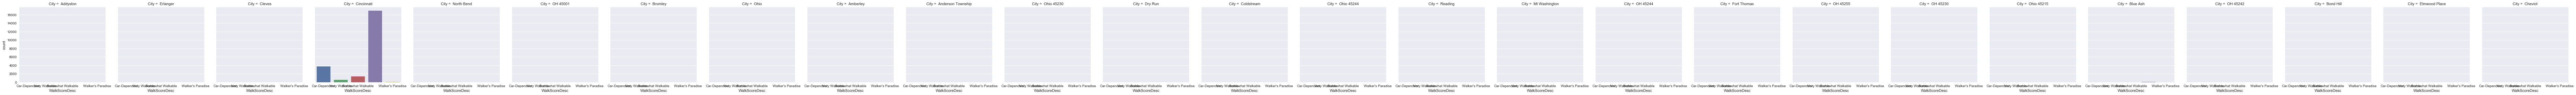

In [92]:
sns.factorplot("WalkScoreDesc",col="City",  data=final_table,kind="count")
plt.show